# Aufgabenstellung 2: Automatisierung des Bereitschaftsdienstplans für Einsatzfahrende mithilfe eines Vorhersagemodells

Als Unternehmensberater im Bereich Data Science wirst Du eingeladen, bei einem Projekt des Berliner Rotkreuz-
Rettungsdienstes mitzuwirken. Die Personalplanung hat Probleme, den Bereitschaftsdienst der Einsatzfahrenden
effizient zu planen. Mithilfe Deines Fachwissens soll die aktuelle Planungslogik verbessert werden.
Tagtäglich sind eine bestimmte Anzahl an Einsatzfahrerenden im Dienst. Jedoch kann es wegen kurzfristiger
Krankenstände der Einsatzfahrenden oder einer unerwartet hohen Anzahl an Notrufen zu Kapazitätsengpässen
kommen und es werden mehr Einsatzfahrende benötigt als ursprünglich angenommen. Folglich muss eine
bestimmte Anzahl an Einsatzfahrenden in Bereitschaft gehalten und bei Bedarf aktiviert werden. In der aktuellen
Planungslogik werden pro Tag 90 Einsatzfahrende in Bereitschaft gehalten.
Kollegen aus dem Planungsbereich sind davon überzeugt, dass es bestimmte saisonale Muster gibt, wie zum
Beispiel, dass in den Wintermonaten mehr Einsatzfahrende aufgrund von Kurzfristkrankenständen ausfallen.

Diese Muster sind im bisherigen Planungsprozess nicht abgebildet. Außerdem fehlen an manchen Tagen sogar
Einsatzfahrende, wenn die Höchstzahl der 90 Ersatzfahrenden erreicht ist, aber mehr Fahrende benötigt werden.
Dann müssen Einsatzfahrende, die keinen Dienst haben, in den Dienst gerufen werden.
Organisatorisch ist es ist sehr wichtig zu wissen, dass der Dienstplan am 15. des laufenden Monats für den
Folgemonat fertiggestellt sein muss. Der Dienstplan für November muss also am 15. Oktober fertiggestellt sein.

## Ziel des Projekts:

Unterstütze die Kolleg:innen der Personalplanung mithilfe eines Vorhersagemodells, das auf Tagesbasis die
Anzahl an Einsatzfahrenden im Bereitschaftsdienst effizient abschätzt. In diesem Zusammenhang bedeutet
effizient, dass der Prozentsatz an aktivierten Einsatzfahrenden höher als im bisherigen Planungsprozess mit
konstant 90 Bereitschaftsfahrenden pro Tag ist. Außerdem sollen Tage mit zu wenig Einsatzfahrenden seltener
als im aktuellen Planungsprozess vorkommen. Beachte, dass der Bereitschaftsplan am 15. des laufenden Monats
für den Folgemonat fertiggestellt sein muss.

## Datensatz:

Der Datensatz und weiterführende Informationen aus dem Fachbereich (Abwesenheitsdaten, Anzahl an Notrufen
auf Tagesbasis) sind in einem separaten zip-Dokument hinterlegt, das zum Kursmaterial angehängt wird.

## Detaillierte Beschreibung der Aufgabe:

Die Aufgabe besteht sowohl aus einem Programmierteil als auch aus konzeptionellen Teilaufgaben. Hier folgt
eine detaillierte Beschreibung an offenen Fragen, die im finalen Dokument beantwortet werden sollen:

● Organisiere das Projekt mithilfe der CRISP-DM oder der MS Team Data Science Methode. Mache einen
Vorschlag, wie die Ordnerstruktur eines Git-Repositories für das Projekt aufgebaut werden soll. Beachte, dass
Du den finalen Code des Projekts nicht nach dieser Ordnerstruktur aufbauen musst.

● Beurteile die Qualität des zur Verfügung gestellten Datensatzes. Bereite Deine Erkenntnisse so auf und
visualisiere sie so, dass Businesspartner in einer klaren und einfachen Weise die wichtigen Zusammenhänge
verstehen können.

● Stelle ein erstes Basismodell (ein sogenanntes Baseline-Modell) auf, sowie ein präzises Vorhersagemodell,
das den Businessanforderungen genügt, nämlich die Anzahl an (aus dem Bereitschaftsdienst) aktivierten
Einsatzfahrenden zu maximieren und gleichzeitig die Tage mit zu wenigen Einsatzfahrenden zu minimieren.

● Damit die Businesspartner Vertrauen in Dein neues Modell entwickeln, solltest du die Wichtigkeit der
einzelnen erklärenden Variablen diskutieren und die Modellresultate so interpretierbar wie möglich
gestalten. Außerdem ist eine detaillierte Fehleranalyse sehr wichtig, damit die Businesspartner auch die
Situationen, in denen Dein Ansatz möglicherweise ungeeignet ist, nachvollziehen können.

Im letzten Schritt des Projekts soll ein Vorschlag unterbreitet werden, wie Dein Modell in die tägliche Arbeit des
Fachbereichs eingebunden werden kann, beispielsweise wie eine graphische Benutzeroberfläche (GUI) aussehen
könnte


## Weiterführende Information von geschäftlicher Seite
• Die Kollegen aus dem Planungsbereich behaupten, dass eine fixe Anzahl an Bereitschaftsfahrern (n_sby
= 90) keiner effizienten Planung entspricht, weil es Tage mit zu wenigen, aber auch Tage mit zu vielen
Bereitschaftsfahren gibt.

Das Ziel der Kollegen aus dem Planungsbereich ist es, den Bereitschaftsdienst
dynamischer zu planen, d.h. dass saisonale Muster abgebildet werden und nicht eine fixe Anzahl an
Fahrern vorgehalten werden.

• Tage mit zu wenigen Bereitschaftsfahrern sollen unbedingt vermieden werden!

## Dataset

sickness_table.csv: Anzahl an Krankenständen, Notrufen, Ersatzfahrern im Bereitschaftsdienst und Zahl
der zusätzlichen Einsatzfahrer, die aktiviert werden müssen (auf Tagesbasis)

Spaltenbeschreibung
• date: Datum

• n_sick: Anzahl der Einsatzfahrer, die einen Krankenstand angemeldet haben

• calls: Anzahl der Notrufe

• n_duty: Anzahl der Einsatzfahrer im Dienst

• n_sby: Anzahl der verfügbaren Ersatzfahrer

• sby_need: Anzahl der Ersatzfahrer, die aktiviert werden

• dafted: Anzahl der zusätzlichen Einsatzfahrer, die aktiviert werden müssen, wenn die Anzahl der
Einsatzfahrer im Bereitschaftsdienst nicht ausreicht


## Libaries und Frameworks

In [4]:
# Installation des Pakets
!pip install tensorflow_decision_forests

# Datenhandling und -verarbeitung
import pandas as pd
import numpy as np
from datetime import datetime as dt, timedelta
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Visualisierung
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

# Datenwissenschaftliche Modelle und Methoden
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel, VarianceThreshold, mutual_info_regression

# TensorFlow und Decision Forests
import tensorflow as tf
import tensorflow_decision_forests as tfdf

#general information about columns of a dataframe
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(df)
#split date column into year, month and day

def split_date_day(date_string):
  return date_string.split("-")[-1]

def split_date_year(date_string):
  return date_string.split("-")[0]

def split_date_month(date_string):
  return date_string.split("-")[1]

def df_split_date_column(df):
  df['day']=df['date_str'].apply(split_date_day)
  df['month']=df['date_str'].apply(split_date_month)
  df['year']=df['date_str'].apply(split_date_year)
    
def df_week_columns(df):
  weekofyear_array=[]
  for cell in df.date:
    weekofyear=cell.to_pydatetime().isocalendar()[1]
    weekofyear_array.append(weekofyear)
  df['weekofyear']=weekofyear_array

def df_convert_month_column(df):
  df["month_int"]=df["month"].astype('int64')
  df["month"].replace(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12' ],
   ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec" ], inplace=True)

  #create day of week colum
  df["date_weekday"]=df["date"].dt.dayofweek
  df["date_weekday"].replace([0, 1, 2, 3, 4, 5, 6], ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], inplace=True)

  #create colum day of week with week of year
  weekday_weekofyear_array=[]
  for n, cell in enumerate(df.weekofyear):
    weekday_weekofyear=f"{df.date_weekday[n]} {cell}"
    weekday_weekofyear_array.append(weekday_weekofyear)
  df["weekday_weekofyear"]=weekday_weekofyear_array
  return df

# Zuordnung der Monate zu den Jahreszeiten
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

def visualize_calls_sby_need_2(df_dict, year_array, weekofyear_start=1, weekofyear_end=52):
  # fix second y scale

  fig, hosts = plt.subplots(len(year_array),1, figsize = (25,12))

  fig.suptitle(f'Standby Driver and Emergency call overview for Week of year {weekofyear_start} to {weekofyear_end}', fontsize=25)

  for n, year in enumerate(year_array):

    df_visu=df_dict[year].loc[(df_dict[year]['weekofyear']>(weekofyear_start-1))&(df_dict[year]['weekofyear']<(weekofyear_end+1))]

    if(weekofyear_start>=df_visu.weekofyear.min())&(weekofyear_end<=df_visu.weekofyear.max()):
      host=plt.subplot(len(year_array),1, n+1)
      #data for the graph

      par2 = host.twinx()
      par1 = host.twinx()

      par2.spines.right.set_position(("axes", 1.05))

      p1, = host.plot(df_visu.weekday_weekofyear, df_visu.calls, "b", label=f"calls {year}", alpha=0.8, linestyle='dashdot', linewidth=1)
      p2, = par1.plot(df_visu.weekday_weekofyear, df_visu.sby_need, "r", label=f"sby_needed {year}", alpha=0.8, linewidth=1)
      p3, = par1.plot(df_visu.weekday_weekofyear, df_visu.n_sick, "g", label=f"n_sick {year}", alpha=0.6, linewidth=1)

      #labels
      host.set_xlabel("Week of Year")
      host.set_ylabel("Emergency calls")
      par1.set_ylabel("Standby Drivers needed")
      par2.set_ylabel("Driver Sick calls")

      host.yaxis.label.set_color(p1.get_color())
      par1.yaxis.label.set_color(p2.get_color())
      par2.yaxis.label.set_color(p3.get_color())

      tkw = dict(size=4, width=1.5)
      host.tick_params(axis='y', colors=p1.get_color(), **tkw)
      par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
      par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
      host.tick_params(axis='x', labelsize=8, **tkw)

      lines = [p1, p2, p3]


      plt.xticks(df_visu.weekday_weekofyear)
      host.legend(handles=[p1, p2, p3], loc='best', title=f'Regular Drivers: {df_dict[year].n_duty.max()}')
      host.grid()
    else:
      host=plt.subplot(len(year_array),1, n+1)
      fig.delaxes(hosts[n])
  plt.show()  

def one_hot_encoding(df, columns_onehot):
    df = df.copy()
    df=pd.get_dummies(df, columns=columns_onehot)
    return df

def data_prep_df(df, one_hot_cols, irrel_cols):
  df_out=df.copy()
  df_out=one_hot_encoding(df_out, one_hot_cols)
  df_out.drop(columns=irrel_cols, inplace=True)
  return df_out





def calculate_active_standby(result_df, planned_col, needed_col):
    """
    Berechnet die aktiven Standby-Fahrer basierend auf den geplanten und benötigten Fahrern.
    
    Parameters:
    - result_df: DataFrame mit den relevanten Daten.
    - planned_col: Name der Spalte mit den geplanten Standby-Fahrern.
    - needed_col: Name der Spalte mit den tatsächlich benötigten Standby-Fahrern.
    
    Returns:
    - Der aggregierte Prozentsatz der aktiven Standby-Fahrer.
    """

    # Initialisiere ein leeres DataFrame
    active_df = pd.DataFrame()

    # Fülle das leere DataFrame mit den relevanten Spalten aus result_df
    active_df[planned_col] = result_df[planned_col]
    active_df[needed_col] = result_df[needed_col]

    # Berechnung der aktiven Standby-Fahrer basierend auf den Bedingungen
    active_df['active'] = active_df.apply(lambda row: row[planned_col] 
                                          if row[planned_col] <= row[needed_col] 
                                          else row[needed_col], axis=1)

    # Berechnung der Aggregation: Summe der aktiven Standby-Fahrer durch die Summe aller geplanten Fahrer
    total_active = active_df['active'].sum()
    total_planned = active_df[planned_col].sum()

    # Vermeidung einer Division durch Null
    if total_planned == 0:
        return 0
    
    # Berechnung des Prozentsatzes der aktiven Standby-Fahrer
    active_percentage = total_active / total_planned
    
    return active_percentage 



def calculate_missing_standby(df, planned_col, needed_col):
    """
    Berechnet die Anzahl der fehlenden Standby-Fahrer und summiert sie für den gesamten Zeitraum auf.
    
    Parameters:
    df (pd.DataFrame): DataFrame, der die Daten enthält.
    planned_col (str): Name der Spalte mit den geplanten Standby-Fahrern.
    needed_col (str): Name der Spalte mit den benötigten Standby-Fahrern.
    
    Returns:
    float: Die aufsummierte Anzahl der fehlenden Standby-Fahrer.
    """
    # Leeren DataFrame für die Berechnung der fehlenden Standby-Fahrer erstellen
    missing_sby_df = pd.DataFrame()
    
    # Fülle den neuen DataFrame mit den relevanten Spalten aus dem ursprünglichen DataFrame
    missing_sby_df[planned_col] = df[planned_col]
    missing_sby_df[needed_col] = df[needed_col]
    
    # Berechnung der fehlenden Standby-Fahrer basierend auf den Bedingungen
    missing_sby_df['missing_sby'] = missing_sby_df.apply(
        lambda row: row[needed_col] - row[planned_col] if row[needed_col] > row[planned_col] else 0, 
        axis=1
    )
    
    # Summiere die Anzahl der fehlenden Standby-Fahrer
    total_missing_sby = missing_sby_df['missing_sby'].sum()
    
    return total_missing_sby

def calculate_days_exceeding_prognosis(df, prediction_column, sby_need_column):
    """
    Berechnet die Anzahl der Tage, an denen der Bedarf an Standby-Fahrern ('sby_need') 
    größer ist als die Prognose ('prediction_column').

    Parameters:
    df (DataFrame): DataFrame, der die Vorhersagen und den tatsächlichen Bedarf enthält.
    prediction_column (str): Spaltenname der Vorhersagewerte.
    sby_need_column (str): Spaltenname des tatsächlichen Bedarfs an Standby-Fahrern.

    Returns:
    int: Anzahl der Tage, an denen der Bedarf an Standby-Fahrern größer war als die Vorhersage.
    """
    # Vergleiche den Bedarf mit der Vorhersage und zähle die Tage, an denen sby_need größer als die Prognose ist
    days_exceeding_prognosis = (df[sby_need_column] > df[prediction_column]).sum()
    
    return days_exceeding_prognosis

import pandas as pd

def distribute_standby_drivers_last_year(übergabe_df, date_column, prediction_column, standby_need_column):
    # Sicherstellen, dass die Datums-Spalte im richtigen Format ist
    übergabe_df[date_column] = pd.to_datetime(übergabe_df[date_column])
    
    # Erstelle eine neue Spalte für die Verteilung der Standby-Fahrer
    übergabe_df['distributed_standby'] = 0
    
    # Gruppiere die Daten nach Jahr und Monat
    übergabe_df['year'] = übergabe_df[date_column].dt.year
    übergabe_df['month'] = übergabe_df[date_column].dt.month
    
    # Für jedes Jahr im DataFrame
    for current_year in übergabe_df['year'].unique():
        # Verteile nur für Jahre nach dem ersten Jahr in den Daten (um auf das Vorjahr zugreifen zu können)
        if current_year > übergabe_df['year'].min():
            for month in übergabe_df[übergabe_df['year'] == current_year]['month'].unique():
                # Daten für den aktuellen Monat und das aktuelle Jahr
                current_month_data = übergabe_df[(übergabe_df['year'] == current_year) & (übergabe_df['month'] == month)]
                
                # Daten für den selben Monat im Vorjahr
                last_year_data = übergabe_df[(übergabe_df['year'] == current_year - 1) & (übergabe_df['month'] == month)]
                
                # Berechne die Summe der Standby-Fahrer im Vorjahr für diesen Monat
                last_year_total = last_year_data[standby_need_column].sum()
                
                # Verteile die Summe der Standby-Fahrer im Vorjahr gleichmäßig auf die Tage des aktuellen Monats
                if not current_month_data.empty and last_year_total > 0:
                    days_in_month = len(current_month_data)
                    distributed_value_per_day = last_year_total / days_in_month
                    
                    # Aktualisiere die verteilten Werte in der neuen Spalte
                    übergabe_df.loc[(übergabe_df['year'] == current_year) & (übergabe_df['month'] == month), 'distributed_standby'] = distributed_value_per_day
    
    # Entferne die Hilfsspalten
    übergabe_df.drop(columns=['year', 'month'], inplace=True)
    
    return übergabe_df


2024-08-31 07:29:42.807457: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Ausreißererkennung
Ausreißererkennung um diese dem Code häufiger zu zuführen

In [6]:

raw_data = pd.read_csv('/Users/frederic/Desktop/-Standby-Duty-Planning---Berlin/Data/Raw Data/sickness_table.csv')

# Berechne den Z-Score für die Spalte 'sby_need'
raw_data['z_score'] = stats.zscore(raw_data['sby_need'])

# Definiere einen Schwellenwert für den Z-Score (zum Beispiel 3)
threshold = 3

# Markiere Ausreißer in der neuen Spalte 'Outlier'
raw_data['Outlier'] = raw_data['z_score'].abs() > threshold

# Entferne temporäre Spalten
raw_data = raw_data.drop(columns=['z_score'])

# Berechne den prozentualen Anteil der Ausreißer
num_outliers = raw_data['Outlier'].sum()
total_entries = len(raw_data)
percentage_outliers = (num_outliers / total_entries) * 100

# Zeige die Daten mit Ausreißern an
print("Daten mit markierten Ausreißern basierend auf Z-Scores:")
print(raw_data[raw_data['Outlier']])

# Ausgabe des prozentualen Anteils der Ausreißer
print(f"Prozentualer Anteil der Ausreißer: {percentage_outliers:.2f}%")

raw_data

Daten mit markierten Ausreißern basierend auf Z-Scores:
      Unnamed: 0        date  n_sick    calls  n_duty  n_sby  sby_need  \
96            96  2016-07-06      51   9702.0    1700     90     292.0   
122          122  2016-08-01      53  10536.0    1700     90     461.0   
123          123  2016-08-02      51  10392.0    1700     90     430.0   
125          125  2016-08-04      52   9840.0    1700     90     320.0   
214          214  2016-11-01      65   9600.0    1700     90     285.0   
367          367  2017-04-03      49  10170.0    1800     90     283.0   
395          395  2017-05-01      64  10218.0    1800     90     308.0   
397          397  2017-05-03      65  10050.0    1800     90     275.0   
426          426  2017-06-01      54  10830.0    1800     90     420.0   
460          460  2017-07-05      49  10398.0    1800     90     329.0   
487          487  2017-08-01      63  10476.0    1800     90     359.0   
488          488  2017-08-02      63  10068.0    1800   

,Unnamed: 0,date,n_sick,calls,n_duty,n_sby,sby_need,dafted,Outlier
0,0,2016-04-01,73,8154.0,1700,90,4.0,0.0,False
1,1,2016-04-02,64,8526.0,1700,90,70.0,0.0,False
2,2,2016-04-03,68,8088.0,1700,90,0.0,0.0,False
3,3,2016-04-04,71,7044.0,1700,90,0.0,0.0,False
4,4,2016-04-05,63,7236.0,1700,90,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...
1147,1147,2019-05-23,86,8544.0,1900,90,0.0,0.0,False
1148,1148,2019-05-24,81,8814.0,1900,90,0.0,0.0,False
1149,1149,2019-05-25,76,9846.0,1900,90,146.0,56.0,False
1150,1150,2019-05-26,83,9882.0,1900,90,160.0,70.0,False


## Datenanalyse und Visualisierung zum erhalten von einem Verständnis für die Daten

In [8]:
# Anzeige der Datentypen und leeren Zellen
raw_data.info()

# Umwandlung der Datums-Spalte von einem String in den Datentyp datetime
raw_data['date_str'] = raw_data['date'].copy()
raw_data['date'] = pd.to_datetime(raw_data['date'])

# Schneller Überblick über die ersten Zeilen des DataFrames
raw_data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1152 non-null   int64  
 1   date        1152 non-null   object 
 2   n_sick      1152 non-null   int64  
 3   calls       1152 non-null   float64
 4   n_duty      1152 non-null   int64  
 5   n_sby       1152 non-null   int64  
 6   sby_need    1152 non-null   float64
 7   dafted      1152 non-null   float64
 8   Outlier     1152 non-null   bool   
dtypes: bool(1), float64(3), int64(4), object(1)
memory usage: 73.2+ KB


,Unnamed: 0,date,n_sick,calls,n_duty,n_sby,sby_need,dafted,Outlier,date_str
0,0,2016-04-01,73,8154.0,1700,90,4.0,0.0,False,2016-04-01
1,1,2016-04-02,64,8526.0,1700,90,70.0,0.0,False,2016-04-02
2,2,2016-04-03,68,8088.0,1700,90,0.0,0.0,False,2016-04-03
3,3,2016-04-04,71,7044.0,1700,90,0.0,0.0,False,2016-04-04
4,4,2016-04-05,63,7236.0,1700,90,0.0,0.0,False,2016-04-05


In [9]:
#anzeigen von kritischen Informationen
display_all(raw_data.describe(include='all').T)

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Unnamed: 0,1152.0,NaN,NaN,NaN,575.5,0.0,287.75,575.5,863.25,1151.0,332.698061
date,1152,NaN,NaN,NaN,2017-10-28 12:00:00,2016-04-01 00:00:00,2017-01-13 18:00:00,2017-10-28 12:00:00,2018-08-12 06:00:00,2019-05-27 00:00:00,NaN
n_sick,1152.0,NaN,NaN,NaN,68.80816,36.0,58.0,68.0,78.0,119.0,14.293942
calls,1152.0,NaN,NaN,NaN,7919.53125,4074.0,6978.0,7932.0,8827.5,11850.0,1290.063571
n_duty,1152.0,NaN,NaN,NaN,1820.572917,1700.0,1800.0,1800.0,1900.0,1900.0,80.086953
n_sby,1152.0,NaN,NaN,NaN,90.0,90.0,90.0,90.0,90.0,90.0,0.0
sby_need,1152.0,NaN,NaN,NaN,34.71875,0.0,0.0,0.0,12.25,555.0,79.694251
dafted,1152.0,NaN,NaN,NaN,16.335938,0.0,0.0,0.0,0.0,465.0,53.394089
Outlier,1152,2,False,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_str,1152,1152,2016-04-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Erstes hinzufügen von weiteren Merkmalen:

* Jahr und Monats-Spalte hinzufügen
* Aufteilen der Datumsspalte in Tag, Monat und Jahr
* Ersetzten der nummerischen Monats und Wochentagsspalten in entsprechende Abkürzungen
* Hinzufügen von Rollierenden Durchschnitten, welche den Regeln der Prognosegenerierung entsprechen:
    Da die Prognosen immer zum 15. eines Monats für den Folege Monat erstellt werden sollen, wird das bei der Berechnung der Durchschnitte beachtet. 

In [11]:
# Spalte "weekofyear" erstellen
weekofyear_array = []
for cell in raw_data.date:
    weekofyear = cell.to_pydatetime().isocalendar()[1]
    weekofyear_array.append(weekofyear)
raw_data['weekofyear'] = weekofyear_array

# Spalte "day of week" erstellen
raw_data["date_weekday"] = raw_data["date"].dt.dayofweek
raw_data["date_weekday"].replace([0, 1, 2, 3, 4, 5, 6], ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], inplace=True)

# Spalte "day of week with week of year" erstellen
weekday_weekofyear_array = []
for n, cell in enumerate(raw_data.weekofyear):
    weekday_weekofyear = f"{raw_data.date_weekday[n]} {cell}"
    weekday_weekofyear_array.append(weekday_weekofyear)
raw_data["weekday_weekofyear"] = weekday_weekofyear_array

# Datums-Spalte in Tag, Monat und Jahr aufteilen
raw_data['day'] = raw_data['date_str'].apply(split_date_day)
raw_data['month'] = raw_data['date_str'].apply(split_date_month)
raw_data['year'] = raw_data['date_str'].apply(split_date_year)

# Monatsspalte in eine Spalte mit Integern und Monatsabkürzungen umwandeln
raw_data["month_int"] = raw_data["month"].astype('int64')
raw_data["month"].replace(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], 
                          ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], inplace=True)

# Spalte mit den Jahreszeiten hinzufügen
raw_data['season'] = raw_data['month_int'].apply(get_season)

# Überprüfung der Daten
print(raw_data[['date', 'month', 'season']].head())

raw_data


        date month  season
0 2016-04-01   Apr  Spring
1 2016-04-02   Apr  Spring
2 2016-04-03   Apr  Spring
3 2016-04-04   Apr  Spring
4 2016-04-05   Apr  Spring


,Unnamed: 0,date,n_sick,calls,n_duty,n_sby,sby_need,dafted,Outlier,date_str,weekofyear,date_weekday,weekday_weekofyear,day,month,year,month_int,season
0,0,2016-04-01,73,8154.0,1700,90,4.0,0.0,False,2016-04-01,13,Fri,Fri 13,01,Apr,2016,4,Spring
1,1,2016-04-02,64,8526.0,1700,90,70.0,0.0,False,2016-04-02,13,Sat,Sat 13,02,Apr,2016,4,Spring
2,2,2016-04-03,68,8088.0,1700,90,0.0,0.0,False,2016-04-03,13,Sun,Sun 13,03,Apr,2016,4,Spring
3,3,2016-04-04,71,7044.0,1700,90,0.0,0.0,False,2016-04-04,14,Mon,Mon 14,04,Apr,2016,4,Spring
4,4,2016-04-05,63,7236.0,1700,90,0.0,0.0,False,2016-04-05,14,Tue,Tue 14,05,Apr,2016,4,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,1147,2019-05-23,86,8544.0,1900,90,0.0,0.0,False,2019-05-23,21,Thu,Thu 21,23,May,2019,5,Spring
1148,1148,2019-05-24,81,8814.0,1900,90,0.0,0.0,False,2019-05-24,21,Fri,Fri 21,24,May,2019,5,Spring
1149,1149,2019-05-25,76,9846.0,1900,90,146.0,56.0,False,2019-05-25,21,Sat,Sat 21,25,May,2019,5,Spring
1150,1150,2019-05-26,83,9882.0,1900,90,160.0,70.0,False,2019-05-26,21,Sun,Sun 21,26,May,2019,5,Spring


Hinzufügen von Feiertags und Ferieninformationen:

In [14]:
# Feiertage hinzufügen
# Liste der Feiertage
feiertage = [
    '2016-03-28', '2016-05-01', '2016-05-05', '2016-05-16', '2016-10-03', '2016-12-25', '2016-12-26',
    '2017-01-01', '2017-04-14', '2017-04-17', '2017-05-01', '2017-05-25', '2017-06-05', '2017-10-03',
    '2017-10-31', '2017-12-25', '2017-12-16', '2018-01-01', '2018-03-30', '2018-04-02', '2018-05-01',
    '2018-05-10', '2018-05-21', '2018-10-03', '2018-12-25', '2018-12-26', '2019-01-01', '2019-03-08',
    '2019-04-19', '2019-04-22', '2019-05-01', '2019-05-30', '2019-06-10', '2019-10-03', '2019-12-25',
    '2019-12-26'
]

# Konvertiere die Liste der Feiertage in ein Datetime-Format
feiertage = pd.to_datetime(feiertage)

# Füge die Spalte "Feiertage" hinzu und setze Werte auf 1 oder 0
raw_data['Feiertage'] = raw_data['date'].isin(feiertage).astype(int)

#Schulferientermine für Berlin (2016-2019)
ferien_zeiten = [
    ('2016-02-01', '2016-02-06'),  # Winterferien 2016
    ('2016-03-21', '2016-04-02'),  # Osterferien 2016
    ('2016-07-20', '2016-09-02'),  # Sommerferien 2016
    ('2016-10-17', '2016-10-29'),  # Herbstferien 2016
    ('2016-12-23', '2017-01-03'),  # Weihnachtsferien 2016/17
    ('2017-01-30', '2017-02-04'),  # Winterferien 2017
    ('2017-04-10', '2017-04-22'),  # Osterferien 2017
    ('2017-07-20', '2017-09-01'),  # Sommerferien 2017
    ('2017-10-23', '2017-11-04'),  # Herbstferien 2017
    ('2017-12-21', '2018-01-02'),  # Weihnachtsferien 2017/18
    ('2018-02-05', '2018-02-10'),  # Winterferien 2018
    ('2018-03-26', '2018-04-07'),  # Osterferien 2018
    ('2018-07-05', '2018-08-17'),  # Sommerferien 2018
    ('2018-10-22', '2018-11-02'),  # Herbstferien 2018
    ('2018-12-24', '2019-01-04'),  # Weihnachtsferien 2018/19
    ('2019-02-04', '2019-02-09'),  # Winterferien 2019
    ('2019-04-15', '2019-04-26'),  # Osterferien 2019
    ('2019-06-20', '2019-08-02'),  # Sommerferien 2019
    ('2019-10-04', '2019-10-18'),  # Herbstferien 2019
    ('2019-12-23', '2020-01-04'),  # Weihnachtsferien 2019/20
]

# Funktion definieren, um zu prüfen, ob ein Datum in den Ferien liegt
def is_holiday(date, ferien_zeiten):
    for start, end in ferien_zeiten:
        if pd.to_datetime(start) <= date <= pd.to_datetime(end):
            return True
    return False

# Erstelle eine neue Spalte für die Schulferien und setze Werte auf 0 oder 1
raw_data['schulferien'] = raw_data['date'].apply(lambda x: int(is_holiday(x, ferien_zeiten)))


print(raw_data)

      Unnamed: 0       date  n_sick   calls  n_duty  n_sby  sby_need  dafted  \
0              0 2016-04-01      73  8154.0    1700     90       4.0     0.0   
1              1 2016-04-02      64  8526.0    1700     90      70.0     0.0   
2              2 2016-04-03      68  8088.0    1700     90       0.0     0.0   
3              3 2016-04-04      71  7044.0    1700     90       0.0     0.0   
4              4 2016-04-05      63  7236.0    1700     90       0.0     0.0   
...          ...        ...     ...     ...     ...    ...       ...     ...   
1147        1147 2019-05-23      86  8544.0    1900     90       0.0     0.0   
1148        1148 2019-05-24      81  8814.0    1900     90       0.0     0.0   
1149        1149 2019-05-25      76  9846.0    1900     90     146.0    56.0   
1150        1150 2019-05-26      83  9882.0    1900     90     160.0    70.0   
1151        1151 2019-05-27      77  8790.0    1900     90       0.0     0.0   

      Outlier    date_str  weekofyear d

Hinzufügen von Durschnitten der sby_need-variable

In [16]:

# Funktion zum Berechnen des gleitenden Durchschnitts
def calculate_rolling_averages(series, window):
    return series.rolling(window=window, min_periods=1).mean()

# Berechne und fülle die Daten für alle verfügbaren Monate
def calculate_and_fill(raw_data):
    # Extrahiere alle verfügbaren Monate
    months = raw_data["date"].dt.month.unique()

    # Für jeden verfügbaren Monat
    for month in months:
        # Filter für den 15. des aktuellen Monats
        mask = (raw_data["date"].dt.month == month) & (raw_data["date"].dt.day == 15)
        if mask.any():
            # Berechne gleitende Durchschnitte für die Daten am 15.
            current_15_data = raw_data[mask]
            avg_df = pd.DataFrame(index=raw_data.index)
            for window in range(7, 31):  # Von 7 bis 30 Tage
                avg_df[f'avg_{window}'] = calculate_rolling_averages(raw_data["sby_need"], window)

            # Werte für den 15. eintragen
            raw_data.loc[mask, avg_df.columns] = avg_df.loc[mask.index, avg_df.columns]

            # Index des letzten und vorletzten 15. finden
            current_15_date = current_15_data["date"].iloc[0]
            last_15_index = raw_data[(raw_data["date"] < current_15_date) & (raw_data["date"].dt.day == 15)].index.max()
            if pd.notna(last_15_index):
                last_15_values = avg_df.loc[last_15_index]
                raw_data.loc[(raw_data["date"].dt.month == month) & (raw_data["date"].dt.day < 15), avg_df.columns] = last_15_values

            # Vorletzten 15. finden
            prev_15_index = raw_data[(raw_data["date"] < current_15_date) & (raw_data["date"].dt.day == 15) & (raw_data.index < last_15_index)].index.max()
            if pd.notna(prev_15_index):
                prev_15_values = avg_df.loc[prev_15_index]
                raw_data.loc[(raw_data["date"].dt.month == month) & (raw_data["date"].dt.day > 15), avg_df.columns] = prev_15_values

    # NaN-Werte mit den nachfolgenden Werten füllen
    raw_data.fillna(method='bfill', inplace=True)
    # NaN-Werte am Anfang und Ende noch einmal behandeln
    raw_data.fillna(method='ffill', inplace=True)
    
    return raw_data

# Berechnung und Auffüllen der Daten
raw_data = calculate_and_fill(raw_data)

# Ausgabe der Daten
print(raw_data)
raw_data.to_csv('/Users/frederic/Desktop/-Standby-Duty-Planning---Berlin/Data/Raw Data/rolling.csv', index=False)

      Unnamed: 0       date  n_sick   calls  n_duty  n_sby  sby_need  dafted  \
0              0 2016-04-01      73  8154.0    1700     90       4.0     0.0   
1              1 2016-04-02      64  8526.0    1700     90      70.0     0.0   
2              2 2016-04-03      68  8088.0    1700     90       0.0     0.0   
3              3 2016-04-04      71  7044.0    1700     90       0.0     0.0   
4              4 2016-04-05      63  7236.0    1700     90       0.0     0.0   
...          ...        ...     ...     ...     ...    ...       ...     ...   
1147        1147 2019-05-23      86  8544.0    1900     90       0.0     0.0   
1148        1148 2019-05-24      81  8814.0    1900     90       0.0     0.0   
1149        1149 2019-05-25      76  9846.0    1900     90     146.0    56.0   
1150        1150 2019-05-26      83  9882.0    1900     90     160.0    70.0   
1151        1151 2019-05-27      77  8790.0    1900     90       0.0     0.0   

      Outlier    date_str  ...      avg

# Darstellung der Vairablen im Zeitverlauf
Darstellung der Variablen n_sick, calls, n_duty und sby_need

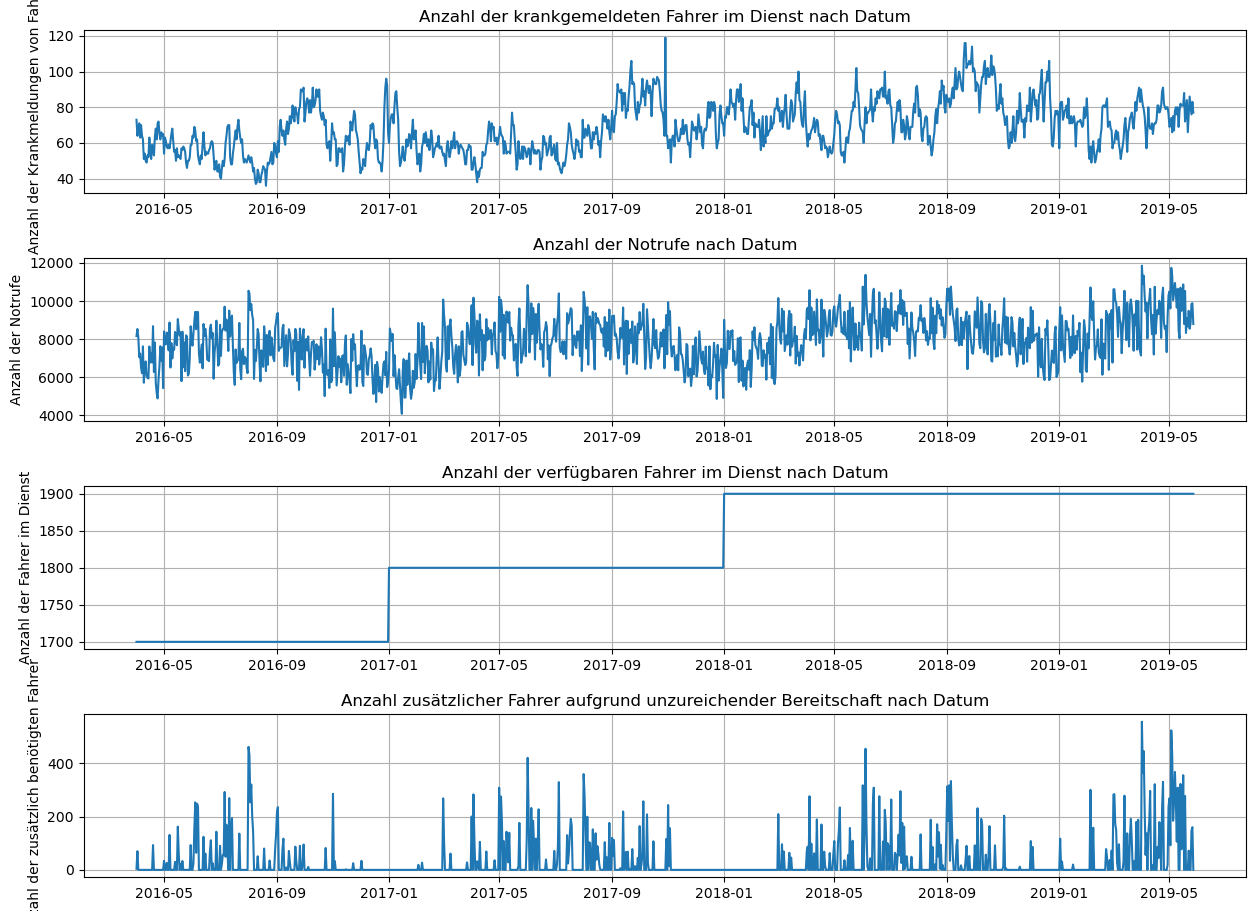

In [18]:
# Listen mit Titeln für die Diagramme und Beschriftungen für die y-Achsen
titel_list = ['Anzahl der krankgemeldeten Fahrer im Dienst',
              'Anzahl der Notrufe',
              'Anzahl der verfügbaren Fahrer im Dienst',
              'Anzahl zusätzlicher Fahrer aufgrund unzureichender Bereitschaft']

y_label_list = ['Anzahl der Krankmeldungen von Fahrern',
               'Anzahl der Notrufe',
               'Anzahl der Fahrer im Dienst',
               'Anzahl der zusätzlich benötigten Fahrer']

# Liste der Spaltennamen im DataFrame, die geplottet werden sollen
cols = ['n_sick',
        'calls',
        'n_duty',
        'sby_need']

# Erstellen einer Subplot-Leinwand mit 4 Zeilen und 1 Spalte, Größe der gesamten Figur festlegen
f, axs = plt.subplots(4, 1, figsize=(15, 11))
# Abstand zwischen den Subplots einstellen
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Schleife über die Spaltennamen
for n, col in enumerate(cols):
    # Erstellen eines Subplots in der entsprechenden Position
    ax = plt.subplot(4, 1, n + 1)
    # Plotten der Daten für die entsprechende Spalte gegen das Datum
    ax.plot(raw_data['date'], raw_data[col])
    # Beschriftung der y-Achse festlegen
    plt.ylabel(f'{y_label_list[n]}')
    # Titel für das Diagramm festlegen
    plt.title(f'{titel_list[n]} nach Datum')
    # Rasterlinien hinzufügen
    plt.grid()

# Anzeigen der Diagramme
plt.show()


# Jahre - Visualisierung in Jahren
* Durchschnittswertde der Variablen pro Jahr

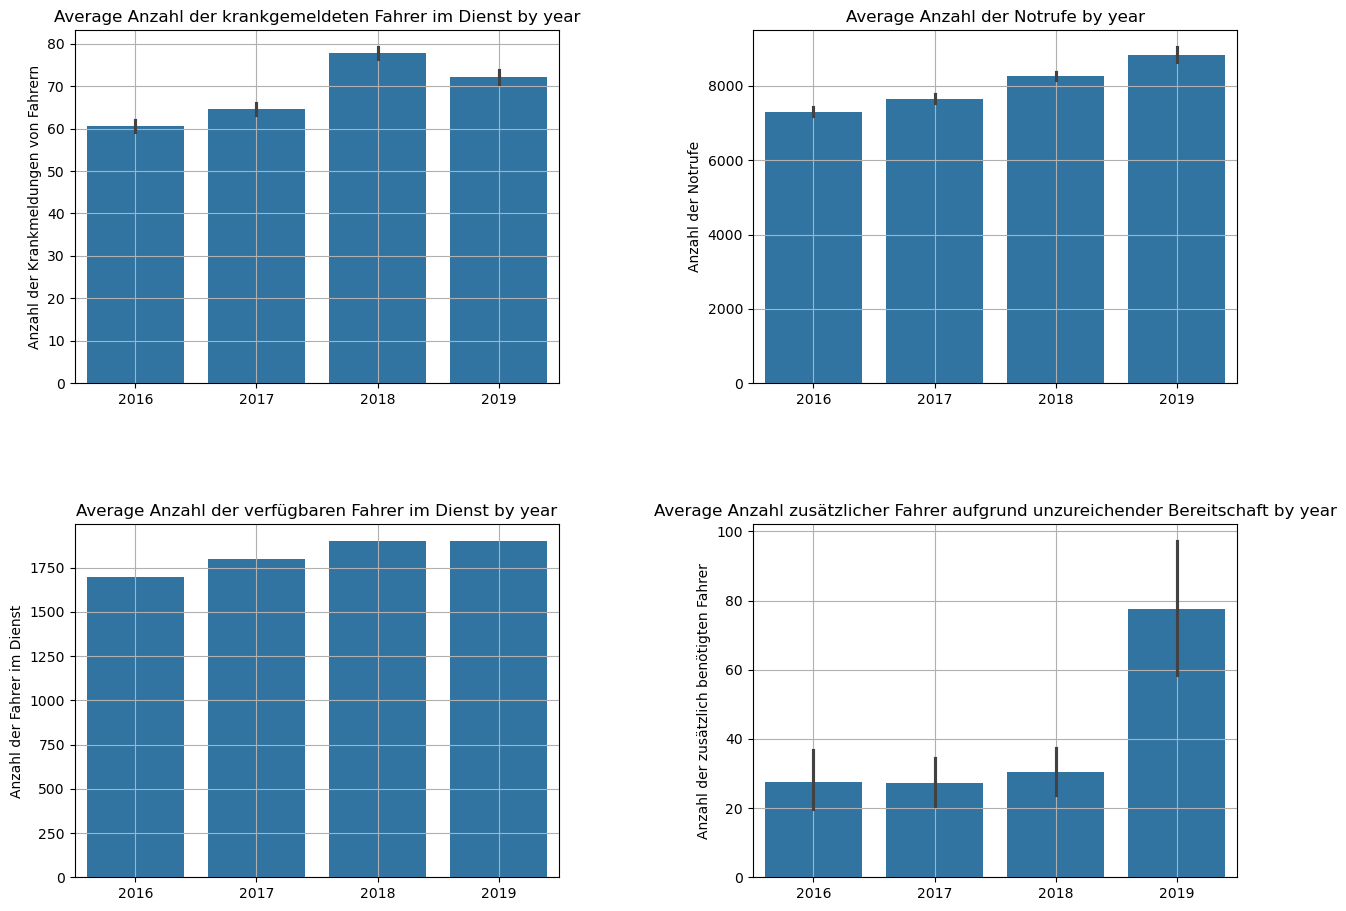

In [20]:
f, axs = plt.subplots(2,2, figsize=(15,11))
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

for n, col in enumerate(cols):
    ax=plt.subplot(2,2, n + 1)
    sns.barplot(data=raw_data, x="year", y=cols[n])
    plt.ylabel(f'{y_label_list[n]}')
    ax.set(xlabel=None)
    plt.title(f'Average {titel_list[n]} by year')
    plt.grid()

plt.show()

Absolute Anzahl von benötigten Standbyfahrern pro Jahr

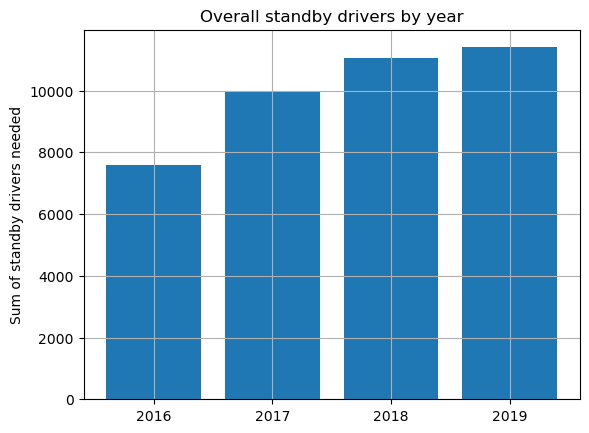

In [22]:
list_overall_standby=[]
list_years=['2016','2017', '2018', '2019']
for yr in list_years:
  sum=raw_data[raw_data.year==yr]['sby_need'].sum()
  list_overall_standby.append(sum)
df_sby_year = pd.DataFrame({'year': list_years, 'overall_sby': list_overall_standby})

plt.bar(list_years, list_overall_standby)
plt.ylabel(f'Sum of standby drivers needed')
plt.title(f'Overall standby drivers by year')
plt.grid()
plt.show()

# Monate- Visualisierung bei Monaten
Durchschnittswerte der Variable pro Monat

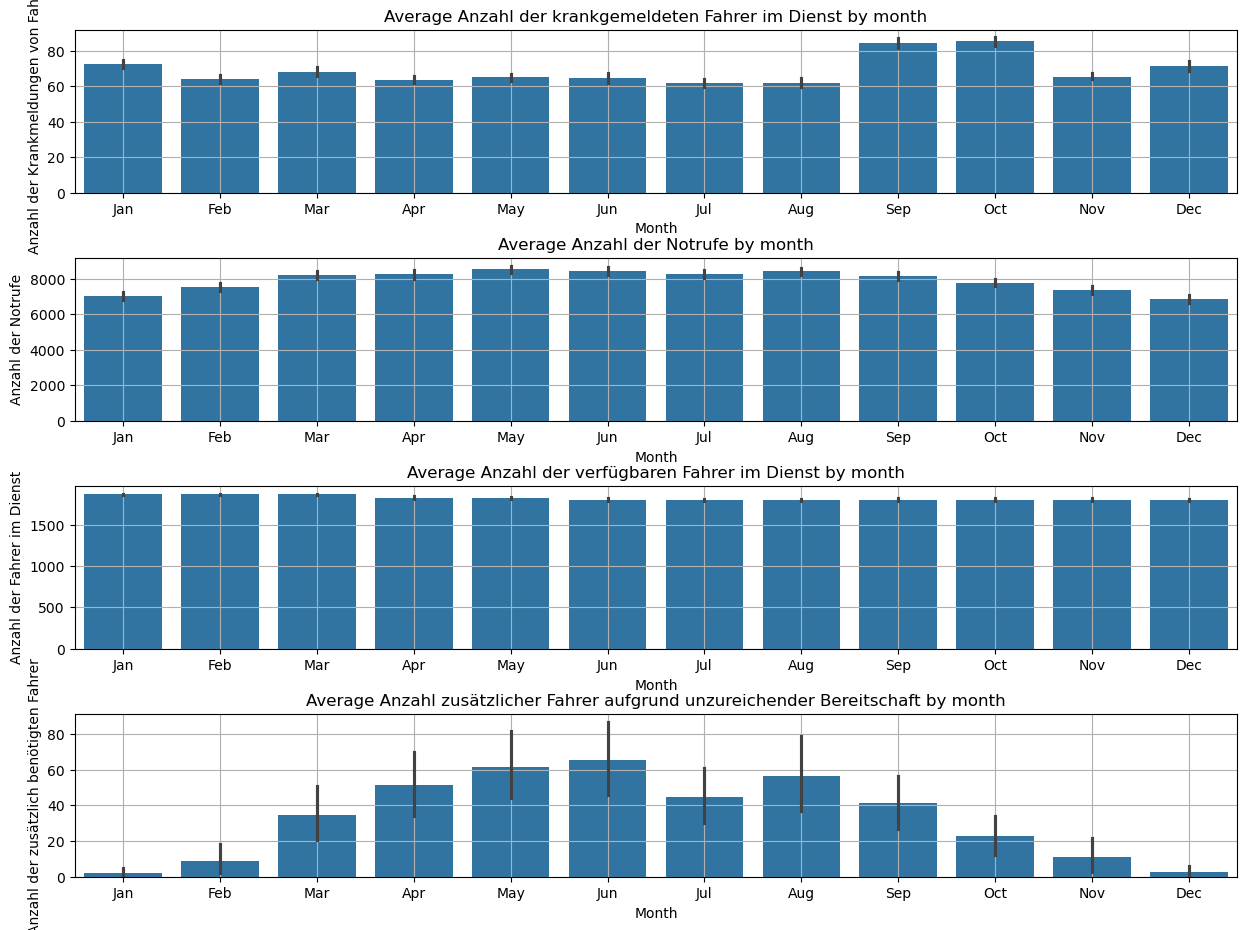

In [24]:
f, axs = plt.subplots(4,1, figsize=(15,11))
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
month_order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec" ]

for n, col in enumerate(cols):
    ax=plt.subplot(4,1, n + 1)
    sns.barplot(data=raw_data, x="month", y=cols[n], order=month_order)
    plt.ylabel(f'{y_label_list[n]}')
    plt.xlabel("Month")
    plt.title(f'Average {titel_list[n]} by month')
    plt.grid()

plt.show()

# Erkenntnisse

n_sick:
* In September und Oktober ist die durchschnittliche Anzahl von Krankheitsfällen am höchsten
* July und August sind am niedrigsten

calls:
* Die Anzahl der Notrufe sind im Mai und August am höchsten
* Die Wintermonate zeigen einen niedrigeren Wert auf

n_duty:
* Durchschnittliche Anzahl von eingeplannten Fahrern bleibt über das Jahr gesehen verteilt
* Die Anzahl der Fahrer wird teilweise am Anfang des Jahres für das gesamte Jahr erhöht

drafted:
* Im Juni ist die Anzahl der zusätzlich benötigten Stand-by fahrer am höchsten
* In den Wintermonaten ist die durchschnittliche Anzahl dagegen sehr gering

Interpretation:
* Ohne weitere Rückschlüsse auf die Daten ist zu vermuten, dass ein enger Zusammenahng zwischen der Anzahl der Notrufe und der Anzahl der benötigten Zusatzfahrer besteht

# Wochentag - Visualisierung der Daten pro Wochentag

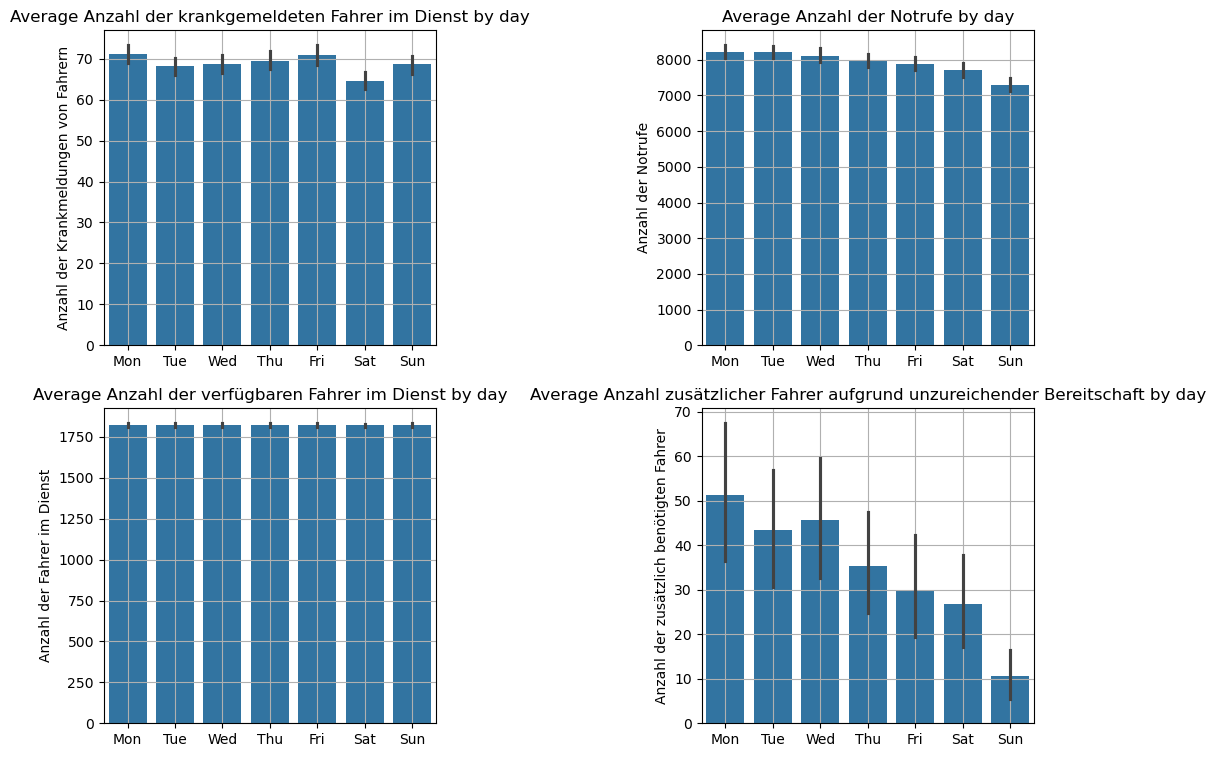

In [27]:
f, axs = plt.subplots(2,2, figsize=(12,9))
plt.subplots_adjust(wspace = 0.8, hspace = 0.2)

day_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

for n, col in enumerate(cols):
    ax=plt.subplot(2,2, n + 1)
    sns.barplot(data=raw_data, x="date_weekday", y=cols[n], order=day_order)
    plt.ylabel(f'{y_label_list[n]}')
    plt.title(f'Average {titel_list[n]} by day')
    ax.set(xlabel=None)

    plt.grid()

plt.show()

calls
* Durchschnittliche Anzahl der Notrufe sinkt im Verlauf der Woche

dafted
* Durchschnittliche Anzahl der benötigten Fahrer sinkt im Verlauf der Woche

In [29]:
raw_data[raw_data.year=='2016']
raw_data[raw_data.year=='2017']
raw_data[raw_data.year=='2018']
raw_data[raw_data.year=='2019'];

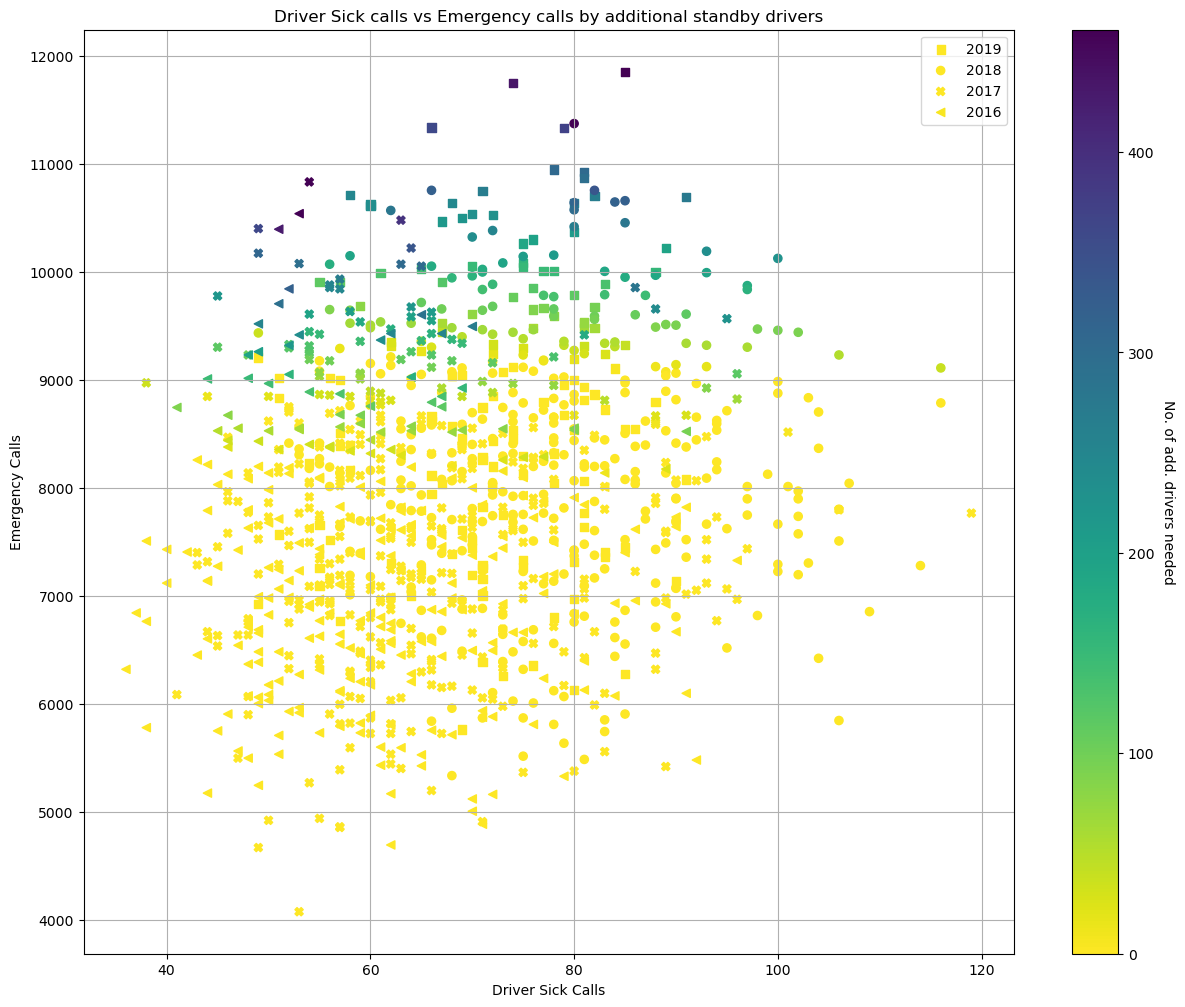

In [30]:
fig, ax = plt.subplots( figsize = (15,12))


plt.scatter(raw_data[raw_data.year=='2019'].n_sick, raw_data[raw_data.year=='2019'].calls,
            c=raw_data[raw_data.year=='2019'].sby_need, cmap='viridis_r', s=35, marker='s', label='2019')
plt.scatter(raw_data[raw_data.year=='2018'].n_sick, raw_data[raw_data.year=='2018'].calls,
            c=raw_data[raw_data.year=='2018'].sby_need, cmap='viridis_r', s=35, marker='o', label='2018')
plt.scatter(raw_data[raw_data.year=='2017'].n_sick, raw_data[raw_data.year=='2017'].calls,
            c=raw_data[raw_data.year=='2017'].sby_need, cmap='viridis_r', s=35, marker='X', label='2017')
plt.scatter(raw_data[raw_data.year=='2016'].n_sick, raw_data[raw_data.year=='2016'].calls,
            c=raw_data[raw_data.year=='2016'].sby_need, cmap='viridis_r', s=35, marker='<', label='2016')
plt.ylabel(f'Emergency Calls')
plt.xlabel(f'Driver Sick Calls')
plt.title(f'Driver Sick calls vs Emergency calls by additional standby drivers')
ax.legend()
cbar=plt.colorbar()
cbar.set_label('No. of add. drivers needed', rotation=270, labelpad=15)
plt.grid()


# Interpretation

* Mit zunehmender Anzahl der Anrufe steigt die Anzahl der zusätzlich benötigten Fahrer
* Ein Einfluss der Krankheitsfälle ist nicht wahrzunehmen
* Eklennbar ist, dass mit steigender Jahreszahl die Anzahl der zusätzlich benötigtern Fahrer zurück geht, während die ANzhal der Krankheitsmeldungen steigt
    * Dies ist auf die gesteigende Anzahl der Fahrer im Dienst zurück zuführen

In [32]:
print(raw_data)

      Unnamed: 0       date  n_sick   calls  n_duty  n_sby  sby_need  dafted  \
0              0 2016-04-01      73  8154.0    1700     90       4.0     0.0   
1              1 2016-04-02      64  8526.0    1700     90      70.0     0.0   
2              2 2016-04-03      68  8088.0    1700     90       0.0     0.0   
3              3 2016-04-04      71  7044.0    1700     90       0.0     0.0   
4              4 2016-04-05      63  7236.0    1700     90       0.0     0.0   
...          ...        ...     ...     ...     ...    ...       ...     ...   
1147        1147 2019-05-23      86  8544.0    1900     90       0.0     0.0   
1148        1148 2019-05-24      81  8814.0    1900     90       0.0     0.0   
1149        1149 2019-05-25      76  9846.0    1900     90     146.0    56.0   
1150        1150 2019-05-26      83  9882.0    1900     90     160.0    70.0   
1151        1151 2019-05-27      77  8790.0    1900     90       0.0     0.0   

      Outlier    date_str  ...      avg

Verbleibende Spalten nach dem Filtern nicht-numerischer und ausgeschlossener Spalten:
Unnamed: 0       int64
n_sick           int64
calls          float64
n_duty           int64
sby_need       float64
Feiertage        int64
schulferien      int64
dtype: object


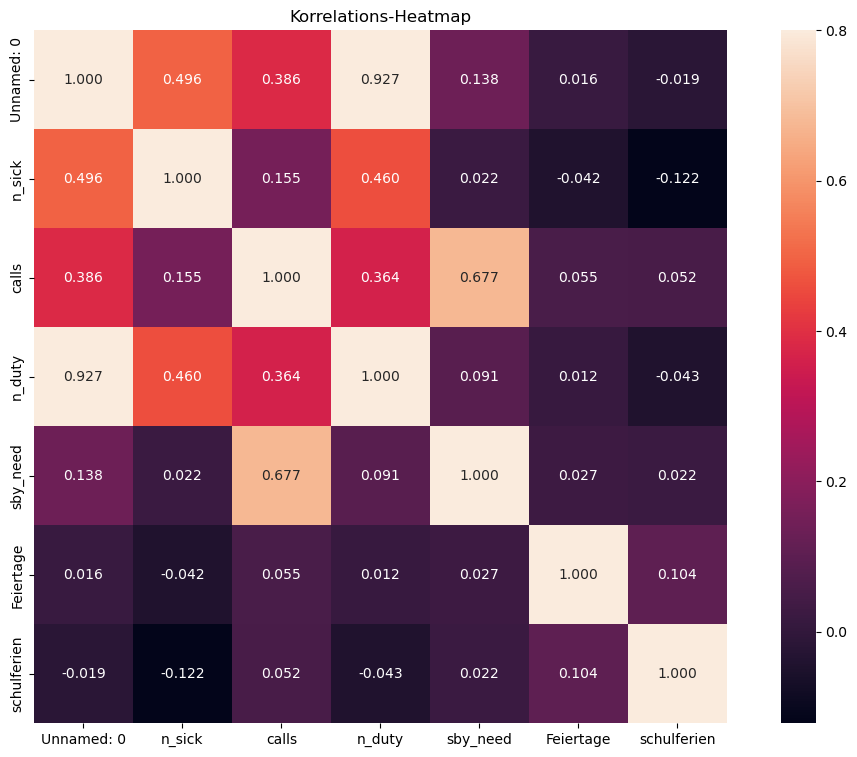

In [33]:
# Entferne nicht-numerische Spalten sowie die explizit genannten Spalten, die ausgeschlossen werden sollen
# Die Liste der zu entfernenden Spalten enthält jetzt auch die 'avg_*'-Spalten
columns_to_exclude = [
    'n_sby', 'dafted', 'month_int', 'weekofyear',
    'avg_7', 'avg_8', 'avg_9', 'avg_10', 'avg_11', 'avg_12', 'avg_13', 'avg_14', 
    'avg_15', 'avg_16', 'avg_17', 'avg_18', 'avg_19', 'avg_20', 'avg_21', 
    'avg_22', 'avg_23', 'avg_24', 'avg_25', 'avg_26', 'avg_27', 'avg_28', 
    'avg_29', 'avg_30'
]

# Entferne die aufgeführten Spalten aus dem DataFrame
raw_data_temp = raw_data.drop(columns=columns_to_exclude)

# Wähle nur die numerischen Spalten aus dem verbleibenden DataFrame aus
raw_data_temp = raw_data_temp.select_dtypes(include=['number'])

# Überprüfe, welche Spalten nach dem Entfernen der nicht-numerischen und ausgeschlossenen Spalten übrig bleiben (optional)
print("Verbleibende Spalten nach dem Filtern nicht-numerischer und ausgeschlossener Spalten:")
print(raw_data_temp.dtypes)

# Berechne die Korrelationsmatrix der verbleibenden numerischen Spalten
corrmat = raw_data_temp.corr()

# Erstelle eine Heatmap, um die Korrelationsmatrix zu visualisieren
f, ax = plt.subplots(figsize=(14, 9))  # Festlegung der Größe der Heatmap
plt.title('Korrelations-Heatmap')  # Titel der Heatmap
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt=".3f")  # Zeichnen der Heatmap mit Beschriftungen und Formatierung
plt.show()  # Anzeige der Heatmap


In [34]:
#erstelle die neue Spalte raw_data
raw_data["real_data"]=1
raw_data['month_day'] = raw_data['month'].str.cat(raw_data['day'], sep=' ')

In [35]:
# Index anpassen, 91. Tag ab dem 01.04.2016
new_index_range = range(91, 91 + len(raw_data))
raw_data['new_index'] = new_index_range
raw_data.set_index('new_index', inplace=True)

# Erstelle den Bereich von Daten vom 01.2016 bis 12.2019
t = np.arange('2016', '2020', dtype='datetime64[D]')
date_data = {'date1': t}

# Erstelle ein leeres DataFrame mit dem Bereich von Daten als erste Spalte
raw_data_empty = pd.DataFrame(date_data)

# Füge dem DataFrame die bestehenden Spalten von raw_data mit 0 als Werte hinzu
for col in raw_data.columns:
    raw_data_empty[col] = 0

# Setze dem DataFrame den Bereich von Daten mit korrektem Index zu
raw_data_empty['date'] = raw_data_empty['date1']
raw_data_empty.drop(columns=['date1'], inplace=True)

# Übertrage die Daten von raw_data in das leere DataFrame
raw_data_empty2 = raw_data.reindex_like(raw_data_empty)

raw_data_empty2['date'] = raw_data_empty['date']
raw_data_empty2['date_str'] = raw_data_empty2.date.astype(str)

raw_data_comp = raw_data_empty2.copy()

# Fülle NaN-Werte mit 0
raw_data_comp.fillna(value=0, inplace=True)

df_split_date_column(raw_data_comp)  # Funktion aufrufen, um die Datumsspalte zu splitten
df_week_columns(raw_data_comp)       # Funktion aufrufen, um die Wochenspalten zu erstellen
df_convert_month_column(raw_data_comp)  # Funktion aufrufen, um die Monatsspalte zu konvertieren

# Erstelle vier separate DataFrames, damit sie nebeneinander visualisiert werden können
raw_data_2016 = raw_data_comp[raw_data_comp['year'] == '2016']
raw_data_2017 = raw_data_comp[raw_data_comp.year == '2017']
raw_data_2018 = raw_data_comp[raw_data_comp.year == '2018']
raw_data_2019 = raw_data_comp[raw_data_comp.year == '2019']

# Setze die Indizes zurück
raw_data_2016.reset_index(inplace=True)
raw_data_2017.reset_index(inplace=True)
raw_data_2018.reset_index(inplace=True)
raw_data_2019.reset_index(inplace=True)

# Lege die DataFrames in einem Dictionary ab, um sie in einer Schleife zu verwenden
year_df_dict = {'2016': raw_data_2016, '2017': raw_data_2017, '2018': raw_data_2018, '2019': raw_data_2019}


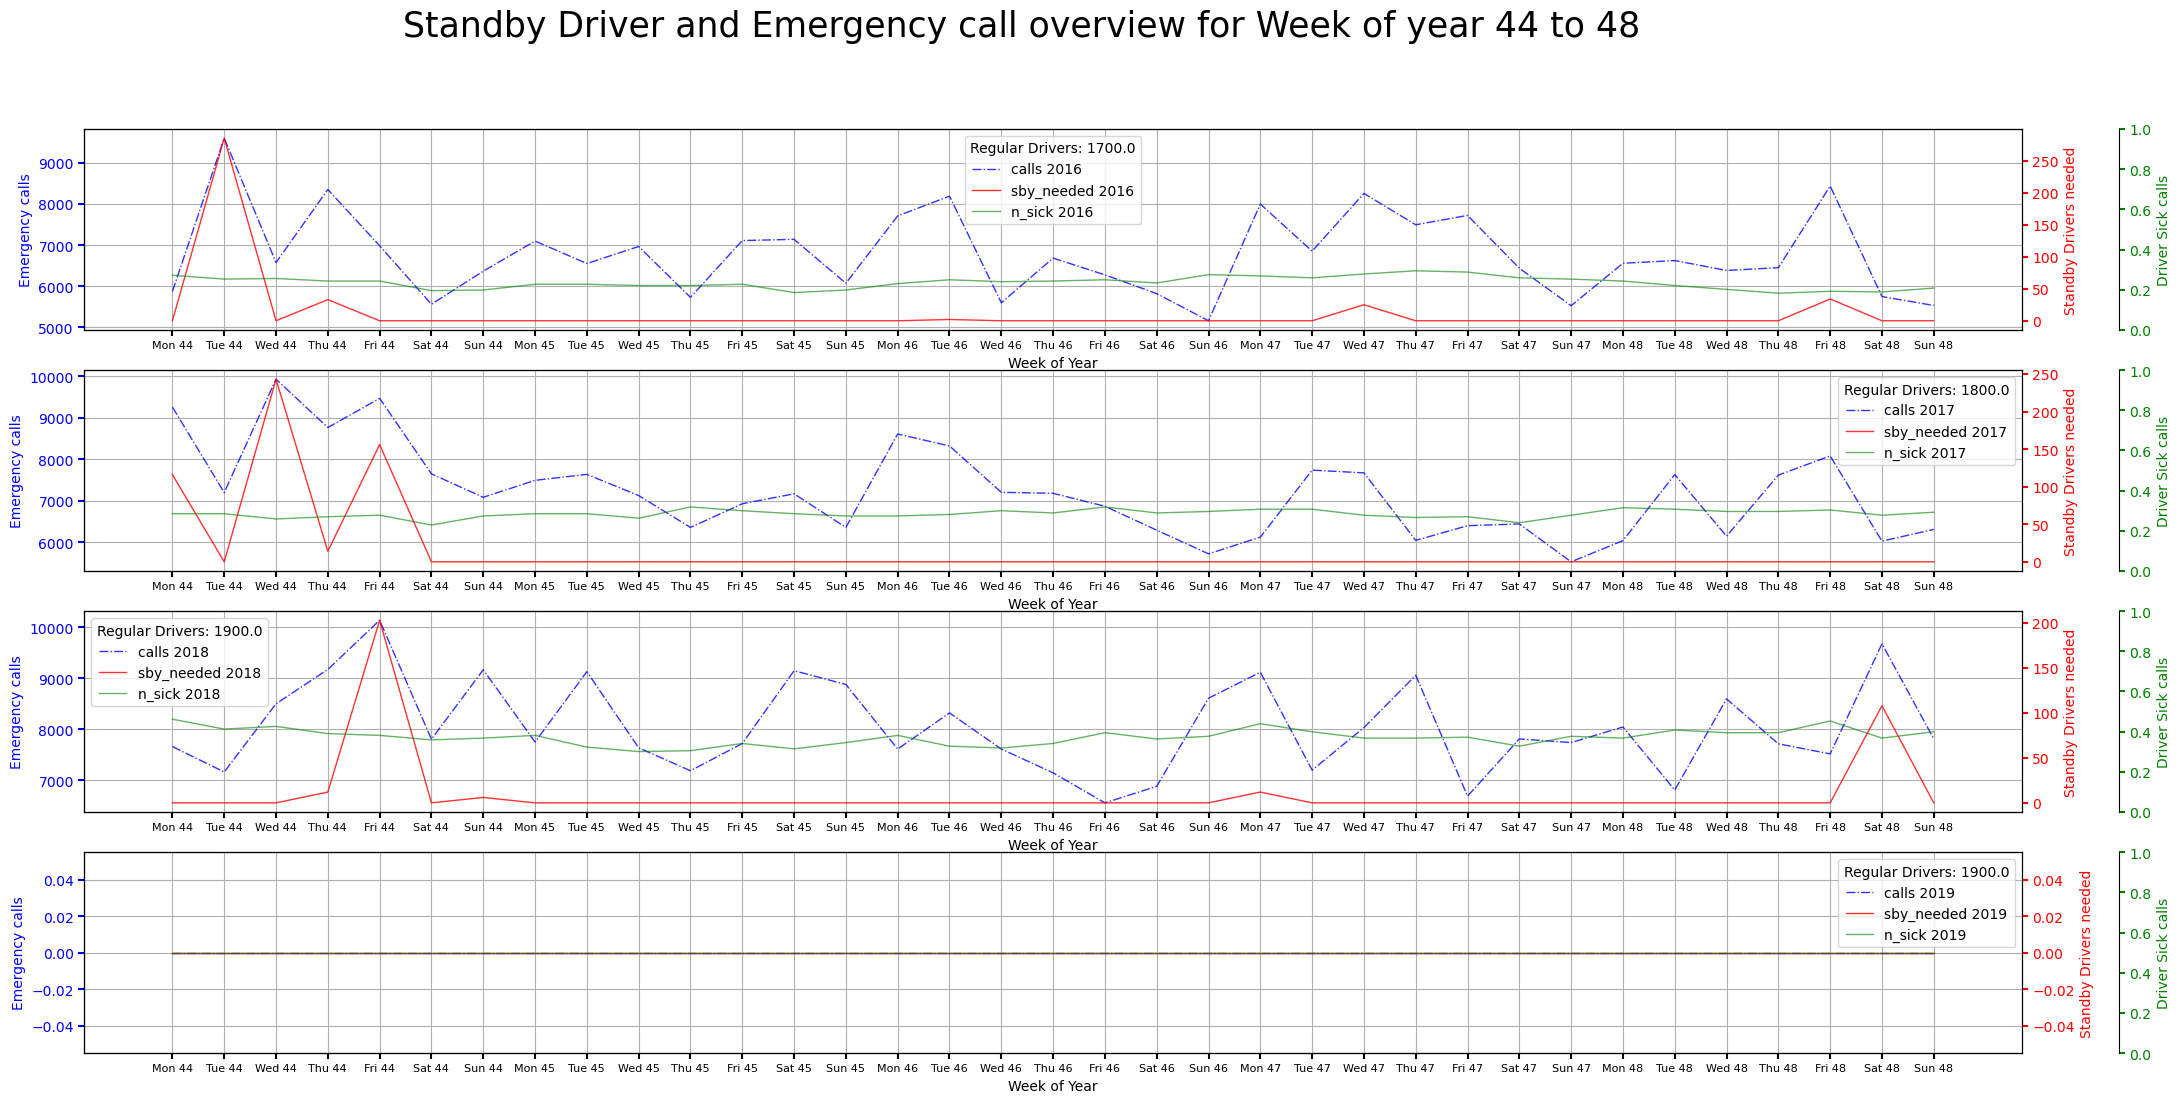

In [36]:
years=['2016', '2017', '2018', '2019']

visualize_calls_sby_need_2(year_df_dict, years, weekofyear_start=44, weekofyear_end=48)

In [37]:
print(year_df_dict['2019'].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype        
---  ------              --------------  -----        
 0   index               365 non-null    int64        
 1   Unnamed: 0          365 non-null    float64      
 2   date                365 non-null    datetime64[s]
 3   n_sick              365 non-null    float64      
 4   calls               365 non-null    float64      
 5   n_duty              365 non-null    float64      
 6   n_sby               365 non-null    float64      
 7   sby_need            365 non-null    float64      
 8   dafted              365 non-null    float64      
 9   Outlier             365 non-null    object       
 10  date_str            365 non-null    object       
 11  weekofyear          365 non-null    int64        
 12  date_weekday        365 non-null    object       
 13  weekday_weekofyear  365 non-null    object       
 14  day       

# Aktuelle Bereitschaftsplanung


In [39]:
standby_sum_2018=raw_data_2018[raw_data_2018.month=='Jun'].n_sby.sum()

print(f'Standby drivers planned in June 2018: {standby_sum_2018} standby drivers')

sby_need_sum_2018=raw_data_2018[raw_data_2018.month=='Jun'].sby_need.sum()

print(f'Actual Standby drivers needed in June 2018: {sby_need_sum_2018} standby drivers')


current_situation_2018_mse=mean_squared_error(raw_data_2018[raw_data_2018.month=='Jun'].n_sby, raw_data_2018[raw_data_2018.month=='Jun'].sby_need)

print(f'Mean Square Error for June 2018: {current_situation_2018_mse}')

Standby drivers planned in June 2018: 2700.0 standby drivers
Actual Standby drivers needed in June 2018: 2671.0 standby drivers
Mean Square Error for June 2018: 15460.9


# Beurteilung

Ergebnisse für Juni 2018
* Nähe zur Realität: Die tatsächliche Anzahl von 2671 Standby-Fahrern liegt nur 29 Fahrer unter der geplanten Zahl von 2700. Diese Abweichung entspricht etwa 1.07%, was auf eine relativ genaue Planung hinweist.
* MSE-Kontext: Der MSE von 15460.9 ist ein Maß für die Genauigkeit der Planungsprognose. Im Verhältnis zur Anzahl der geplanten Standby-Fahrer (2700) ist der MSE relativ hoch (ca. 5.72-mal die Anzahl der geplanten Fahrer), was auf eine signifikante Fehlergröße hindeutet
* Niedrige Abweichung: Die geringe Differenz von 29 Fahrern zeigt, dass die Planung nah an der tatsächlichen Nachfrage war. Das deutet auf eine gute Planungsgenauigkeit hin.
Hoher MSE: Der hohe MSE zeigt, dass, obwohl die Planung insgesamt gut war, es größere Fehler oder Unsicherheiten in der Planung gab, die weiter untersucht und verbessert werden sollten

In [41]:
standby_sum_2019=raw_data_2019[raw_data_2019.month=='Feb'].n_sby.sum()

print(f'Standby drivers planned in February 2019: {standby_sum_2019} standby drivers')

sby_need_sum_2019=raw_data_2019[raw_data_2019.month=='Feb'].sby_need.sum()

print(f'Actual Standby drivers needed in February 2019: {sby_need_sum_2019} standby drivers')

current_situation_2019_mse=mean_squared_error(raw_data_2019[raw_data_2019.month=='Feb'].n_sby, raw_data_2019[raw_data_2019.month=='Feb'].sby_need)

print(f'Mean Square Error for February 2019: {current_situation_2019_mse}')

Standby drivers planned in February 2019: 2520.0 standby drivers
Actual Standby drivers needed in February 2019: 694.0 standby drivers
Mean Square Error for February 2019: 8281.5


Ergebnisse Februar 2019

Interpretation: Der MSE beträgt etwa 3.29-mal die Anzahl der geplanten Standby-Fahrer, was auf eine hohe Fehlergröße und eine signifikante Diskrepanz zwischen Planung und Realität hinweist.

## Daten Vorbereitung

**One-hot Encoding:** One-Hot Encoding wird häufig in der Datenvorverarbeitung für maschinelles Lernen verwendet, insbesondere bei der Umwandlung von kategorialen Variablen für Modelle, die nur numerische Eingaben akzeptieren, wie z.B. lineare Modelle, neuronale Netze oder andere Algorithmen, die mit numerischen Daten arbeiten.

In [45]:

#kategoriale Spalten, für hot encoding
cat_col=['month', 'date_weekday', 'season', 'weekofyear']

#Anwenden von hot encoding
proc_raw_data=one_hot_encoding(raw_data, cat_col)

**Entfernen von irrelevant feautures:** Für das Modelltraining sind bestimmte Merkmale irrelevant. Entweder wurden die relevanten Informationen bereits extrahiert, oder sie enthalten von Anfang an keine nützlichen Informationen. Beispielsweise war die Spalte dafted nur die Differenz zwischen sby und sby_need. Irrelevante Merkmale sollten entfernt werden, um redundante Informationen zu vermeiden, da sie die Modellleistung verschlechtern oder die Interpretation des Modells erschweren können.

In [47]:
# Entfernen irrelevanter Spalten, bei denen die Informationen redundant oder allgemein nicht nützlich sind

irrel_cols = ['dafted', 'day', 'year', 'date_str', 'n_sby', 'year', 'month_day', 'month_int', 'weekday_weekofyear', 'real_data']
proc_raw_data.drop(columns=irrel_cols, inplace=True)

print(f"Data frame shape: {proc_raw_data.shape}")
print('')

# Wir benötigen dies später für das Random-Forests-Modell
proc_raw_data_tfdf = proc_raw_data.copy()

# Informationsübersicht des DataFrames
proc_raw_data.info()


Data frame shape: (1152, 108)

<class 'pandas.core.frame.DataFrame'>
Index: 1152 entries, 91 to 1242
Columns: 108 entries, Unnamed: 0 to weekofyear_52
dtypes: bool(76), datetime64[ns](1), float64(26), int64(5)
memory usage: 414.8 KB


In [48]:
proc_raw_data.columns
print(proc_raw_data)
proc_raw_data.to_csv('/Users/frederic/Desktop/-Standby-Duty-Planning---Berlin/Data/Processed Data/raw_data.csv', index=False)

           Unnamed: 0       date  n_sick   calls  n_duty  sby_need  Outlier  \
new_index                                                                     
91                  0 2016-04-01      73  8154.0    1700       4.0    False   
92                  1 2016-04-02      64  8526.0    1700      70.0    False   
93                  2 2016-04-03      68  8088.0    1700       0.0    False   
94                  3 2016-04-04      71  7044.0    1700       0.0    False   
95                  4 2016-04-05      63  7236.0    1700       0.0    False   
...               ...        ...     ...     ...     ...       ...      ...   
1238             1147 2019-05-23      86  8544.0    1900       0.0    False   
1239             1148 2019-05-24      81  8814.0    1900       0.0    False   
1240             1149 2019-05-25      76  9846.0    1900     146.0    False   
1241             1150 2019-05-26      83  9882.0    1900     160.0    False   
1242             1151 2019-05-27      77  8790.0    

**Daten in Test und Trainingsdaten aufteilen**: Die Aufteilung der Daten in Test- und Trainingssätze ist notwendig, um das Modell auf neuen, ungesehenen Daten zu evaluieren und so zu verhindern, dass es überanpasst und nur die Trainingsdaten "auswendig" lernt, wodurch die Generalisierbarkeit auf unbekannte Daten sichergestellt wird.

Daten wurden hier nich 80/20 aufgeteilt, da für die Evaluierung ein gesamtes Jahr zur Verfügung stehen soll, um alles Aspekte der Saisonalität abzudecken. Da auch die Reihenfolge der Datenpunkte von Relevanz sein könnte (z.B. bei naiven Zeitreihenmodellen), wurde auch die Reihenfolge der Datenpunkte beibehalten

In [50]:


# Pfad zur CSV-Datei
file_path = '/Users/frederic/Desktop/-Standby-Duty-Planning---Berlin/Data/Processed Data/raw_data.csv'

# Daten einlesen
data = pd.read_csv(file_path) 

print("Originaldaten:")
print(data.head())

# Überprüfen, ob eine Datums-Spalte existiert
if 'date' not in data.columns:
    raise ValueError("Die CSV-Datei muss eine 'date'-Spalte enthalten.")

# Umwandeln der Datums-Spalte in datetime-Format
data['date'] = pd.to_datetime(data['date'])

# Sortieren der Daten nach Datum
data = data.sort_values(by='date')

# Bestimmen des Enddatums für den Testdatensatz (letztes Datum in den Daten)
end_date = data['date'].max()

# Bestimmen des Startdatums für den Testdatensatz (ein Jahr vor dem Enddatum)
start_date = end_date - timedelta(days=365)

# Aufteilen in Test- und Trainingsdaten
test_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
train_data = data[data['date'] < start_date]

# Filtern der Datensätze, bei denen Feiertage = 1 ist
holiday_data = train_data[train_data['Feiertage'] == 1]

# Prüfen, ob Ausreißer-Daten vorhanden sind (sollte vorher definiert werden)
if 'Outlier' not in data.columns:
    raise ValueError("Die CSV-Datei muss eine 'Outlier'-Spalte enthalten.")

# Filtern der Ausreißer-Daten
outlier_data = train_data[train_data['Outlier'] == 1]

# Dreifache Duplizierung der Feiertags-Daten
holiday_data_expanded = pd.concat([holiday_data] * 3, ignore_index=True)

# Dreifache Duplizierung der Ausreißer-Daten
outlier_data_expanded = pd.concat([outlier_data] * 5, ignore_index=True)

# Hinzufügen der duplizierten Feiertags-Daten und Ausreißer-Daten zum ursprünglichen Trainingsdatensatz
train_data = pd.concat([train_data, holiday_data_expanded, outlier_data_expanded], ignore_index=True)

# Überprüfen der Daten
print("Trainingsdatensatz nach Erweiterung:")
print(train_data.head())
print("\nTestdatensatz:")
print(test_data.head())
print("\nOriginaldaten:")
print(data.head())

# Optional: Speichern der Trainings- und Testdaten in separate CSV-Dateien
train_data.to_csv('/Users/frederic/Desktop/-Standby-Duty-Planning---Berlin/Data/Processed Data/train_data.csv', index=False)
test_data.to_csv('/Users/frederic/Desktop/-Standby-Duty-Planning---Berlin/Data/Processed Data/test_data.csv', index=False)


Originaldaten:
   Unnamed: 0        date  n_sick   calls  n_duty  sby_need  Outlier  \
0           0  2016-04-01      73  8154.0    1700       4.0    False   
1           1  2016-04-02      64  8526.0    1700      70.0    False   
2           2  2016-04-03      68  8088.0    1700       0.0    False   
3           3  2016-04-04      71  7044.0    1700       0.0    False   
4           4  2016-04-05      63  7236.0    1700       0.0    False   

   Feiertage  schulferien  avg_7  ...  weekofyear_43  weekofyear_44  \
0          0            1    0.0  ...          False          False   
1          0            1    0.0  ...          False          False   
2          0            0    0.0  ...          False          False   
3          0            0    0.0  ...          False          False   
4          0            0    0.0  ...          False          False   

   weekofyear_45  weekofyear_46  weekofyear_47  weekofyear_48  weekofyear_49  \
0          False          False          Fals

**Datenstandardisierung für Modelltraining:** Standardisierung der Trainings- und Testdaten für eine bessere Verarbeitung durch die Modelle

In [52]:


# Beispiel DataFrame (ersetze dies durch dein tatsächliches DataFrame)
# train_data = pd.read_csv('path_to_your_data.csv')

# Zielvariable und Merkmale trennen
X = train_data.drop(columns=['sby_need', 'n_duty', 'calls', 'n_sick', 'Outlier'])
y = train_data['sby_need']

# Identifiziere nicht-numerische Spalten (z.B. datetime64)
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns

# Beispiel: Umwandlung der datetime64-Spalten in numerische Daten (z.B. Tage seit einem Startdatum)
for col in non_numeric_columns:
    if np.issubdtype(X[col].dtype, np.datetime64):
        X[col] = (X[col] - X[col].min()).dt.total_seconds()  # Umwandlung in Sekunden
    else:
        X = X.drop(columns=[col])  # Entfernen von nicht-numerischen Spalten, die nicht datetime64 sind

# Jetzt ist X vollständig numerisch
X_numeric = X

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Standardisierung der Merkmale
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 1. Lasso-basierte Merkmalsauswahl
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_std, y_train)
lasso_selector = SelectFromModel(lasso, threshold="mean", prefit=True)
X_train_lasso = lasso_selector.transform(X_train_std)
X_test_lasso = lasso_selector.transform(X_test_std)

print("Merkmale nach Lasso-Auswahl:")
print(X_numeric.columns[lasso_selector.get_support()])

# 2. Varianzbasierte Merkmalsauswahl
variance_threshold = VarianceThreshold(threshold=0.01)  # Beispiel-Schwellenwert
X_train_var = variance_threshold.fit_transform(X_train_std)
X_test_var = variance_threshold.transform(X_test_std)

print("Merkmale nach Varianzbasierter Auswahl:")
print(X_numeric.columns[variance_threshold.get_support()])

# 3. Random Forest Feature Importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_std, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Merkmale nach Random Forest Feature Importance:")
for i in range(X_train_std.shape[1]):
    print(f"{X_numeric.columns[indices[i]]}: {importances[indices[i]]}")

# 4. Mutual Information für Regression
mi = mutual_info_regression(X_train_std, y_train)
mi_indices = np.argsort(mi)[::-1]

print("Merkmale nach Mutual Information:")
for i in range(X_train_std.shape[1]):
    print(f"{X_numeric.columns[mi_indices[i]]}: {mi[mi_indices[i]]}")

# Optional: Evaluierung der Modelle mit ausgewählten Merkmalen
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_lasso, y_train)
y_pred_lasso = lasso_model.predict(X_test_lasso)
print("MSE für Lasso-Modell:", mean_squared_error(y_test, y_pred_lasso))




/Users/frederic/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.478e+05, tolerance: 7.859e+02
  model = cd_fast.enet_coordinate_descent(


Merkmale nach Lasso-Auswahl:
Index(['avg_8', 'avg_9', 'avg_11', 'avg_12', 'avg_13', 'avg_14', 'avg_16',
       'avg_17'],
      dtype='object')
Merkmale nach Varianzbasierter Auswahl:
Index(['Unnamed: 0', 'date', 'Feiertage', 'schulferien', 'avg_7', 'avg_8',
       'avg_9', 'avg_10', 'avg_11', 'avg_12', 'avg_13', 'avg_14', 'avg_15',
       'avg_16', 'avg_17', 'avg_18', 'avg_19', 'avg_20', 'avg_21', 'avg_22',
       'avg_23', 'avg_24', 'avg_25', 'avg_26', 'avg_27', 'avg_28', 'avg_29',
       'avg_30'],
      dtype='object')
Merkmale nach Random Forest Feature Importance:
Unnamed: 0: 0.36913301086797423
date: 0.3487762558663722
avg_16: 0.033817131080465565
avg_12: 0.0265538300639218
avg_14: 0.025504288970186632
avg_13: 0.02481673241346788
Feiertage: 0.022127710408704596
avg_25: 0.01980127955398914
schulferien: 0.015467371676232822
avg_30: 0.01392196615367029
avg_20: 0.013793075007540876
avg_24: 0.011946639678078252
avg_21: 0.010289354487654705
avg_23: 0.009945357820344548
avg_22: 0.00817

/Users/frederic/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.746e+04, tolerance: 7.859e+02
  model = cd_fast.enet_coordinate_descent(


In [53]:

# Feature-Matrix X und Zielvariable y für Trainingsdaten
X_train = train_data.drop(columns=['sby_need', 'date', 'calls', 'n_sick', 'Outlier'])  # Alle Spalten außer 'sby_needed' und 'date'
y_train = train_data['sby_need']  # Zielvariable

# Feature-Matrix X und Zielvariable y für Testdaten
X_test = test_data.drop(columns=['sby_need', 'date', 'calls', 'n_sick', 'Outlier'])  # Alle Spalten außer 'sby_needed' und 'date'
y_test = test_data['sby_need']  # Zielvariable

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

#copying data for later comparisons
result_df=y_test.copy()

#making a pandas dataframe out of a pandas series
result_df=pd.DataFrame(result_df)

result_df=result_df.reset_index()

# Modelling

## K_Nearest Neighbour

In [56]:


# Sicherstellen, dass X_train_std, y_train, X_test_std und y_test definiert sind

# Hyperparameter-Tuning für KNeighborsRegressor
param_grid = {
    'n_neighbors': [2, 3, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsRegressor()

# GridSearchCV zur Optimierung des KNN-Modells
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_std, y_train)

# Bestes Modell aus GridSearch extrahieren
best_knn = grid_search.best_estimator_

# Gewählte beste Parameter ausgeben
print("Beste Parameter für KNN:", grid_search.best_params_)

# Modelltraining mit dem besten Modell
best_knn.fit(X_train_std, y_train)

# Modellvorhersage
knn_pred = best_knn.predict(X_test_std)

# MSE und R2 Score zur Modellbewertung
knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)

print("Optimized KNN MSE:", knn_mse)
print("Optimized KNN R2:", knn_r2)

# Ergebnisse für die Visualisierung speichern
# Sicherstellen, dass result_df korrekt initialisiert wurde
result_df['knn'] = knn_pred.tolist()

# Ersetzen negativer Werte durch 0 und Runden
result_df[result_df < 0] = 0
result_df = result_df.round(0)

# Berechnung des Anteils aktiver Standby-Fahrer
knn_active_percentage = calculate_active_standby(result_df, 'knn', 'sby_need')
print(f"Active share of standby drivers: {knn_active_percentage:.2%}")

# Berechnung der insgesamt fehlenden Standby-Fahrer
knn_total_missing = calculate_missing_standby(result_df, 'knn', 'sby_need')
print(f"Total missing standby drivers: {knn_total_missing}")

# Anzahl der Tage berechnen, an denen der tatsächliche Bedarf größer war als die Vorhersage
days_exceeding_prognosis = calculate_days_exceeding_prognosis(result_df, 'knn', 'sby_need')
print(f"Anzahl der Tage, an denen der Standby-Bedarf die Vorhersage überschritt: {days_exceeding_prognosis}")


Beste Parameter für KNN: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Optimized KNN MSE: 12814.694311547662
Optimized KNN R2: -0.23326490941600597
Active share of standby drivers: 33.42%
Total missing standby drivers: 15406.0
Anzahl der Tage, an denen der Standby-Bedarf die Vorhersage überschritt: 108


## Support Vector Regression

In [58]:
# Modellinitialisierung
svr = SVR(C=1.0, epsilon=0.2, kernel='linear')

# Modelltraining
svr.fit(X_train_std, y_train)

# Modellevaluierung und Vorhersage
svr_pred = svr.predict(X_test_std)

# Mittelwert des quadratischen Fehlers (MSE) und R2-Score als Bewertungskennzahlen
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

print("Support Vector Regression MSE:", svr_mse)
print("Support Vector Regression R2:", svr_r2)

# Kombinierter DataFrame für alle Vorhersagen zur zukünftigen Visualisierung
result_df['svr'] = svr_pred.tolist()

# Ersetzen negativer Werte durch 0 und Runden auf
result_df[result_df < 0] = 0
result_df = result_df.round(0)

svr_active_percentage = calculate_active_standby(result_df, 'svr', 'sby_need')
print(f"Anteil der aktiven Standby-Fahrer: {svr_active_percentage:.2%}")

svr_total_missing = calculate_missing_standby(result_df, 'svr', 'sby_need')
print(f"Fehlende Standby-Fahrer insgesamt: {svr_total_missing}")

# Anzahl der Tage berechnen, an denen der tatsächliche Bedarf größer war als die Vorhersage
days_exceeding_prognosis = calculate_days_exceeding_prognosis(result_df, 'svr', 'sby_need')
print(f"Anzahl der Tage, an denen der Standby-Bedarf die Vorhersage überschritt: {days_exceeding_prognosis}")

# R-Score in eine Liste einfügen, für zukünftige Visualisierung
list_r2 = []
list_r2.append(svr_r2)


Support Vector Regression MSE: 13255.824253627863
Support Vector Regression R2: -0.2757185228096539
Anteil der aktiven Standby-Fahrer: 32.81%
Fehlende Standby-Fahrer insgesamt: 17786.0
Anzahl der Tage, an denen der Standby-Bedarf die Vorhersage überschritt: 119


## Random Forest mit TensorFlow Decision Forest

In [60]:
# Kombiniere Trainings-DataFrame, train_test_split wie bei den anderen Modellen
train_df = X_train.copy()
test_df = X_test.copy()
train_df['sby_need'] = y_train
test_df['sby_need'] = y_test

# TensorFlow kann keine binären Variablen verarbeiten, daher werden sie in int64 konvertiert
for col in train_df.columns:
    train_df[col] = train_df[col].astype(np.int64)
    test_df[col] = test_df[col].astype(np.int64)

# Konvertiere DataFrame in Tensoren
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label='sby_need', task=tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label='sby_need', task=tfdf.keras.Task.REGRESSION)

# Modellinitialisierung
rf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)

# Modellbewertung
rf.compile(metrics=["mse"])

# Modelltraining
rf.fit(x=train_ds)

# Warnungen unterdrücken
tf.autograph.set_verbosity(0)

# Modellvorhersage/Bewertung
rf_pred = rf.predict(test_ds)

# Mittelwert des quadratischen Fehlers (MSE) und R2-Score als Bewertungskennzahlen
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("TensorFlow Random Forest Regression MSE:", rf_mse)
print("TensorFlow Random Forest Regression R2:", rf_r2)

# Kombinierter DataFrame für alle Vorhersagen zur zukünftigen Visualisierung
result_df['rf'] = rf_pred.reshape(-1).tolist()

# Ersetzen negativer Werte durch 0 und Runden auf
result_df[result_df < 0] = 0
result_df = result_df.round(0)

rf_active_percentage = calculate_active_standby(result_df, 'rf', 'sby_need')
print(f"Anteil der aktiven Standby-Fahrer: {rf_active_percentage:.2%}")

rf_total_missing = calculate_missing_standby(result_df, 'rf', 'sby_need')
print(f"Fehlende Standby-Fahrer insgesamt: {rf_total_missing}")

# Anzahl der Tage berechnen, an denen der tatsächliche Bedarf größer war als die Vorhersage
days_exceeding_prognosis_rf = calculate_days_exceeding_prognosis(result_df, 'rf', 'sby_need')
print(f"Anzahl der Tage, an denen der Standby-Bedarf die Vorhersage überschritt (rf): {days_exceeding_prognosis_rf}")

# R-Score in eine Liste einfügen, für zukünftige Visualisierung
list_r2.append(rf_r2)


Use /var/folders/wj/rgdct6rx7fjbryz5h_nwf3_c0000gn/T/tmp1n6aqdel as temporary training directory
Reading training dataset...
Training dataset read in 0:00:04.530795. Found 917 examples.
Training model...
Model trained in 0:00:00.575575
Compiling model...


[INFO 24-08-31 07:30:21.8713 CEST kernel.cc:1243] Loading model from path /var/folders/wj/rgdct6rx7fjbryz5h_nwf3_c0000gn/T/tmp1n6aqdel/model/ with prefix 7af42a7e42a04db9
[INFO 24-08-31 07:30:21.9834 CEST decision_forest.cc:660] Model loaded with 300 root(s), 48756 node(s), and 94 input feature(s).
[INFO 24-08-31 07:30:21.9835 CEST abstract_model.cc:1312] Engine "RandomForestOptPred" built
[INFO 24-08-31 07:30:21.9835 CEST kernel.cc:1075] Use fast generic engine


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.
1/1 [==============================] - 0s 110ms/step
TensorFlow Random Forest Regression MSE: 9556.47732543749
TensorFlow Random Forest Regression R2: 0.08030048500872933
Anteil der aktiven Standby-Fahrer: 44.26%
Fehlende Standby-Fahrer insgesamt: 14672.0
Anzahl der Tage, an denen der Standby-Bedarf die Vorhersage überschritt (rf): 105


## Ridge und Lasso-Regression

In [62]:
# Merkmale skalieren
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Hyperparameter für Ridge Regression
ridge_param_grid = {
    'alpha': [318, 319, 320, 321, 322, 323, 324, 325],
    'positive': [True, False]
}

ridge = Ridge(random_state=42, max_iter=10000)
ridge_grid_search = GridSearchCV(ridge, ridge_param_grid, cv=10, scoring='r2')
ridge_grid_search.fit(X_train_std, y_train)

# Bestes Ridge-Modell
best_ridge = ridge_grid_search.best_estimator_

# Vorhersagen für Ridge Regression mit dem besten Modell
ridge_pred = best_ridge.predict(X_test_std)

# Hyperparameter für Lasso Regression
lasso_param_grid = {
    'alpha': [0.001, 0.01, 0.5, 0.9, 1, 1.1, 2, 3, 4, 5, 6, 10, 100],
}

lasso = Lasso(random_state=42, max_iter=100000)  # Erhöhte max_iter
lasso_grid_search = GridSearchCV(lasso, lasso_param_grid, cv=10, scoring='r2')
lasso_grid_search.fit(X_train_std, y_train)

# Bestes Lasso-Modell
best_lasso = lasso_grid_search.best_estimator_

# Vorhersagen für Lasso Regression mit dem besten Modell
lasso_pred = best_lasso.predict(X_test_std)

# MSE und R2-Score für Ridge und Lasso
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("Optimierter Ridge Regression MSE:", ridge_mse)
print("Optimierter Ridge Regression R2:", ridge_r2)
print("Optimierter Lasso Regression MSE:", lasso_mse)
print("Optimierter Lasso Regression R2:", lasso_r2)

# Ergebnisse für die Visualisierung speichern
result_df['ridge'] = ridge_pred.tolist()
result_df['lasso'] = lasso_pred.tolist()

# Negative Werte durch 0 ersetzen und runden
result_df[result_df < 0] = 0
result_df = result_df.round(0)

# Berechnung des Anteils aktiver Standby-Fahrer
ridge_active_percentage = calculate_active_standby(result_df, 'ridge', 'sby_need')
print(f"Anteil der aktiven Standby-Fahrer (Ridge): {ridge_active_percentage:.2%}")

lasso_active_percentage = calculate_active_standby(result_df, 'lasso', 'sby_need')
print(f"Anteil der aktiven Standby-Fahrer (Lasso): {lasso_active_percentage:.2%}")

# Anzahl der Tage berechnen, an denen der tatsächliche Bedarf größer war als die Vorhersage für Lasso
days_exceeding_prognosis_lasso = calculate_days_exceeding_prognosis(result_df, 'lasso', 'sby_need')
print(f"Anzahl der Tage, an denen der Standby-Bedarf die Vorhersage überschritt (Lasso): {days_exceeding_prognosis_lasso}")

# Anzahl der Tage berechnen, an denen der tatsächliche Bedarf größer war als die Vorhersage für Ridge
days_exceeding_prognosis_ridge = calculate_days_exceeding_prognosis(result_df, 'ridge', 'sby_need')
print(f"Anzahl der Tage, an denen der Standby-Bedarf die Vorhersage überschritt (Ridge): {days_exceeding_prognosis_ridge}")

# Berechnung der insgesamt fehlenden Standby-Fahrer
ridge_total_missing = calculate_missing_standby(result_df, 'ridge', 'sby_need')
print(f"Fehlende Standby-Fahrer insgesamt (Ridge): {ridge_total_missing}")

lasso_total_missing = calculate_missing_standby(result_df, 'lasso', 'sby_need')
print(f"Fehlende Standby-Fahrer insgesamt (Lasso): {lasso_total_missing}")

# R2-Scores zur Liste hinzufügen
list_r2 = [ridge_r2, lasso_r2]

# Beste Parameter ausgeben
print("Beste Parameter für Ridge Regression:", ridge_grid_search.best_params_)
print("Beste Parameter für Lasso Regression:", lasso_grid_search.best_params_)


/Users/frederic/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.696e+05, tolerance: 9.309e+02
  model = cd_fast.enet_coordinate_descent(
/Users/frederic/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.066e+04, tolerance: 8.804e+02
  model = cd_fast.enet_coordinate_descent(
/Users/frederic/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

Optimierter Ridge Regression MSE: 8949.480908111758
Optimierter Ridge Regression R2: 0.13871681265803482
Optimierter Lasso Regression MSE: 9153.085149963994
Optimierter Lasso Regression R2: 0.11912227838511491
Anteil der aktiven Standby-Fahrer (Ridge): 41.17%
Anteil der aktiven Standby-Fahrer (Lasso): 40.67%
Anzahl der Tage, an denen der Standby-Bedarf die Vorhersage überschritt (Lasso): 89
Anzahl der Tage, an denen der Standby-Bedarf die Vorhersage überschritt (Ridge): 84
Fehlende Standby-Fahrer insgesamt (Ridge): 9381.0
Fehlende Standby-Fahrer insgesamt (Lasso): 10757.0
Beste Parameter für Ridge Regression: {'alpha': 325, 'positive': True}
Beste Parameter für Lasso Regression: {'alpha': 6}


## Optimierte Ridge-Regression

In [64]:
##Model erfüllt beide bedingungen


# Standardisierung der Features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Initialisiere das Ridge-Modell
ridge2 = Ridge(random_state=42, max_iter=10000)

# Merkmalsauswahl mit Ridge-Regression
selector = SelectFromModel(estimator=ridge2, threshold='mean')
selector.fit(X_train_std, y_train)

# Wähle die wichtigsten Merkmale aus
X_train_selected = selector.transform(X_train_std)
X_test_selected = selector.transform(X_test_std)

# Hyperparameter-Raster für die Ridge-Regression
ridge_param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'positive': [True, False]
}

# GridSearchCV für Ridge-Regression
ridge_grid_search = GridSearchCV(ridge2, ridge_param_grid, cv=10, scoring='r2')
ridge_grid_search.fit(X_train_selected, y_train)

# Bestes Ridge-Modell
best_ridge = ridge_grid_search.best_estimator_

# Vorhersagen für die Ridge-Regression
ridge_pred2 = best_ridge.predict(X_test_selected)

# MSE und R² für Ridge
ridge2_mse = mean_squared_error(y_test, ridge_pred2)
ridge2_r2 = r2_score(y_test, ridge_pred2)

print("Optimized Ridge Regression MSE:", ridge2_mse)
print("Optimized Ridge Regression R2:", ridge2_r2)

# Füge die Vorhersagen zum DataFrame hinzu
result_df['ridge2'] = ridge_pred2.tolist()

# Negative Werte durch 0 ersetzen und runden
result_df[result_df < 0] = 0
result_df = result_df.round(0)

# Anzahl der Tage berechnen, an denen der tatsächliche Bedarf größer war als die Vorhersage
days_exceeding_prognosis_ridge = calculate_days_exceeding_prognosis(result_df, 'ridge2', 'sby_need')
print(f"Number of days where standby need exceeded prediction (Ridge): {days_exceeding_prognosis_ridge}")

# Berechnung des Anteils der aktiven Standby-Fahrer
ridge_active_percentage = calculate_active_standby(result_df, 'ridge2', 'sby_need')
print(f"Active share of standby drivers (Ridge): {ridge_active_percentage:.2%}")

# Berechnung der insgesamt fehlenden Standby-Fahrer
ridge_total_missing = calculate_missing_standby(result_df, 'ridge2', 'sby_need')
print(f"Total missing standby drivers (Ridge): {ridge_total_missing}")

# R²-Wert zur Liste hinzufügen
list_r2.append(ridge2_r2)

# Beste Parameter ausgeben
print("Beste Parameter für Ridge Regression:", ridge_grid_search.best_params_)


Optimized Ridge Regression MSE: 9311.289579194643
Optimized Ridge Regression R2: 0.10389694671968996
Number of days where standby need exceeded prediction (Ridge): 81
Active share of standby drivers (Ridge): 39.95%
Total missing standby drivers (Ridge): 9154.0
Beste Parameter für Ridge Regression: {'alpha': 100, 'positive': True}


Optimized Ridge Regression MSE: 9311.289579194643
Optimized Ridge Regression R2: 0.10389694671968996
Number of days where standby need exceeded prediction (Ridge): 81
Active share of standby drivers (Ridge): 39.95%
Total missing standby drivers (Ridge): 9154.0
Beste Parameter für Ridge Regression: {'alpha': 100, 'positive': True}
Permutationsbasierte Merkmalswichtigkeit:
Feature 25: Importance 0.0441
Feature 26: Importance 0.0381
Feature 22: Importance 0.0104
Feature 17: Importance 0.0044
Feature 21: Importance 0.0042
Feature 19: Importance 0.0026
Feature 24: Importance 0.0005
Feature 18: Importance 0.0003
Feature 14: Importance -0.0000
Feature 15: Importance -0.0000
Feature 1: Importance -0.0000
Feature 4: Importance -0.0000
Feature 7: Importance -0.0000
Feature 28: Importance -0.0000
Feature 0: Importance -0.0000
Feature 16: Importance -0.0000
Feature 20: Importance -0.0000
Feature 23: Importance -0.0000
Feature 27: Importance -0.0000
Feature 13: Importance -0.0029
Feature 5: Importa

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


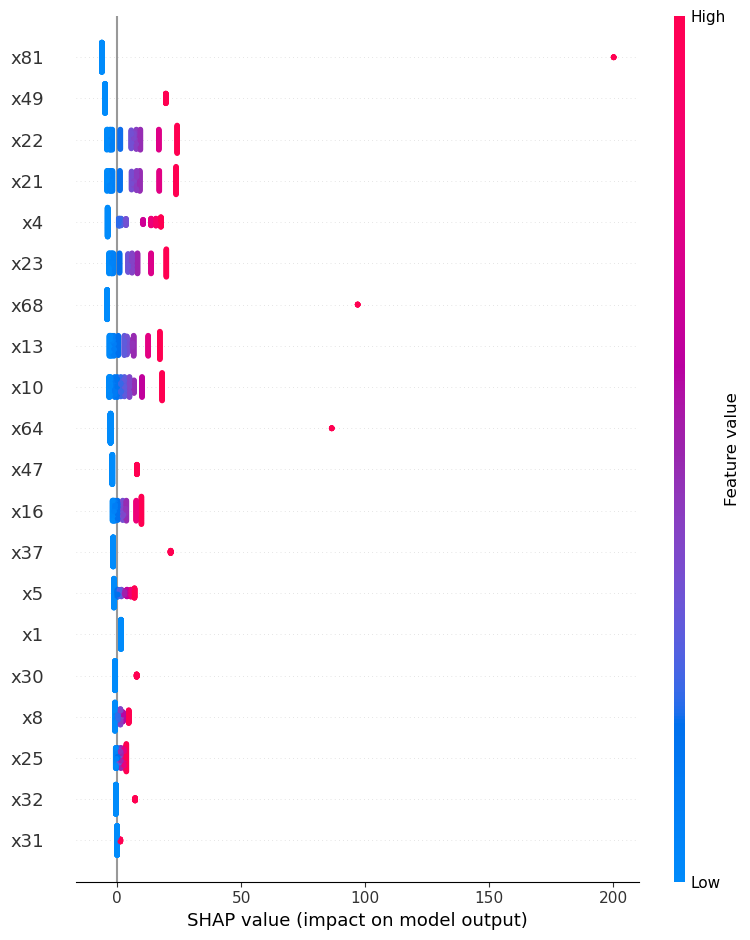

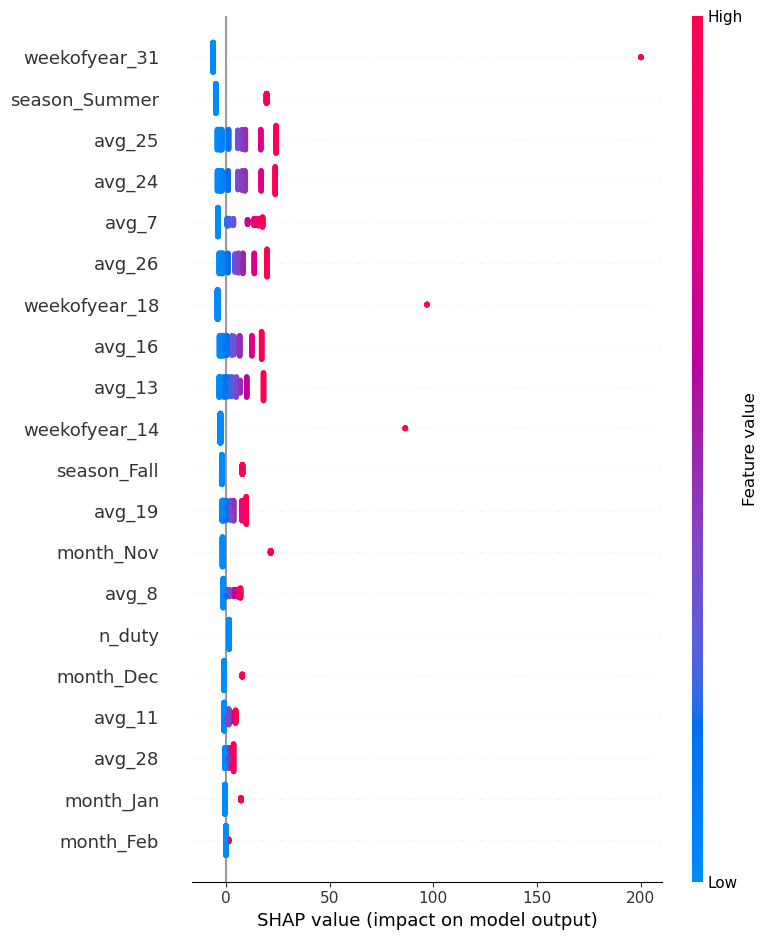

In [80]:
# Standardisierung der Features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Initialisiere das Ridge-Modell
ridge2 = Ridge(random_state=42, max_iter=10000)

# Merkmalsauswahl mit Ridge-Regression
selector = SelectFromModel(estimator=ridge2, threshold='mean')
selector.fit(X_train_std, y_train)

# Wähle die wichtigsten Merkmale aus
X_train_selected = selector.transform(X_train_std)
X_test_selected = selector.transform(X_test_std)

# Hyperparameter-Raster für die Ridge-Regression
ridge_param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'positive': [True, False]
}

# GridSearchCV für Ridge-Regression
ridge_grid_search = GridSearchCV(ridge2, ridge_param_grid, cv=10, scoring='r2')
ridge_grid_search.fit(X_train_selected, y_train)

# Bestes Ridge-Modell
best_ridge = ridge_grid_search.best_estimator_

# Vorhersagen für die Ridge-Regression
ridge_pred2 = best_ridge.predict(X_test_selected)

# MSE und R² für Ridge
ridge2_mse = mean_squared_error(y_test, ridge_pred2)
ridge2_r2 = r2_score(y_test, ridge_pred2)

print("Optimized Ridge Regression MSE:", ridge2_mse)
print("Optimized Ridge Regression R2:", ridge2_r2)

# Füge die Vorhersagen zum DataFrame hinzu
result_df['ridge2'] = ridge_pred2.tolist()

# Negative Werte durch 0 ersetzen und runden
result_df[result_df < 0] = 0
result_df = result_df.round(0)

# Anzahl der Tage berechnen, an denen der tatsächliche Bedarf größer war als die Vorhersage
days_exceeding_prognosis_ridge = calculate_days_exceeding_prognosis(result_df, 'ridge2', 'sby_need')
print(f"Number of days where standby need exceeded prediction (Ridge): {days_exceeding_prognosis_ridge}")

# Berechnung des Anteils der aktiven Standby-Fahrer
ridge_active_percentage = calculate_active_standby(result_df, 'ridge2', 'sby_need')
print(f"Active share of standby drivers (Ridge): {ridge_active_percentage:.2%}")

# Berechnung der insgesamt fehlenden Standby-Fahrer
ridge_total_missing = calculate_missing_standby(result_df, 'ridge2', 'sby_need')
print(f"Total missing standby drivers (Ridge): {ridge_total_missing}")

# R²-Wert zur Liste hinzufügen
list_r2.append(ridge2_r2)

# Beste Parameter ausgeben
print("Beste Parameter für Ridge Regression:", ridge_grid_search.best_params_)

# ===================== Merkmalswichtigkeit =====================

# Permutationsbasierte Merkmalswichtigkeit
from sklearn.inspection import permutation_importance

permutation_importance_result = permutation_importance(best_ridge, X_test_selected, y_test, n_repeats=10, random_state=42)
print("Permutationsbasierte Merkmalswichtigkeit:")
for i in permutation_importance_result.importances_mean.argsort()[::-1]:
    print(f"Feature {i}: Importance {permutation_importance_result.importances_mean[i]:.4f}")

# SHAP-Werte zur Erklärung der Merkmale
import shap

# Berechnung der SHAP-Werte für das beste Ridge-Modell
explainer = shap.LinearExplainer(best_ridge, X_train_selected, feature_dependence="independent")
shap_values = explainer.shap_values(X_test_selected)

# Visualisierung der SHAP-Werte
shap.summary_plot(shap_values, X_test_selected, feature_names=selector.get_feature_names_out())

import shap
import pandas as pd

# Sicherstellen, dass das Modell bereits trainiert ist und SHAP-Werte berechnet wurden
explainer = shap.Explainer(best_ridge, X_train_selected)
shap_values = explainer(X_test_selected)

# Zuordnung der tatsächlichen Spaltennamen zu den ausgewählten Merkmalen
selected_columns = X_train.columns[selector.get_support()]

# Erstellen eines DataFrames mit den SHAP-Werten und den tatsächlichen Spaltennamen
shap_values_df = pd.DataFrame(shap_values.values, columns=selected_columns)

# Plotten des SHAP Summary Plots mit tatsächlichen Spaltennamen
shap.summary_plot(shap_values_df.values, features=X_test_selected, feature_names=selected_columns)


# ================================================================


## Support Vector Regression unter der Anwendung von GridSearchCV zur Optimierung der Parameter

In [74]:
# Modellinitialisierung
svr_opt = SVR(C=44300.0, epsilon=14.4, kernel='rbf')

# Modelltraining
svr_opt.fit(X_train_std, y_train)

# Modellauswertung und Vorhersage
svr_pred_opt = svr_opt.predict(X_test_std)

# Mittelwert des quadratischen Fehlers und R2-Score als Bewertungskennzahlen
svr_mse_opt = mean_squared_error(y_test, svr_pred_opt)
svr_r2_opt = r2_score(y_test, svr_pred_opt)

print("Support Vector Regression MSE:", svr_mse_opt)
print("Support Vector Regression R2:", svr_r2_opt)

# Kombinierter DataFrame für alle Vorhersagen zur zukünftigen Visualisierung
result_df['svr_opt'] = svr_pred_opt.tolist()

# Negative Werte durch 0 ersetzen und runden
result_df[result_df < 0] = 0
result_df = result_df.round(0)

# Anzahl der Tage berechnen, an denen der tatsächliche Bedarf größer war als die Vorhersage
days_exceeding_prognosis = calculate_days_exceeding_prognosis(result_df, 'svr_opt', 'sby_need')
print(f"Anzahl der Tage, an denen der Standby-Bedarf die Vorhersage überschritt: {days_exceeding_prognosis}")

svm_opt_active_percentage = calculate_active_standby(result_df, 'svr_opt', 'sby_need')
print(f"Anteil der aktiven Standby-Fahrer: {svm_opt_active_percentage:.2%}")

svm_opt_total_missing = calculate_missing_standby(result_df, 'svr_opt', 'sby_need')
print(f"Fehlende Standby-Fahrer insgesamt: {svm_opt_total_missing}")

# R2-Score zur Liste hinzufügen, für zukünftige Visualisierung
list_r2.append(svr_opt)


Support Vector Regression MSE: 11034.02779700664
Support Vector Regression R2: -0.06189651978718391
Anzahl der Tage, an denen der Standby-Bedarf die Vorhersage überschritt: 107
Anteil der aktiven Standby-Fahrer: 43.33%
Fehlende Standby-Fahrer insgesamt: 15111.0


## Berechnung des Vergleichswert mit 90 sby-Fahrern an jedem Tag

In [67]:
# 1. Füge eine neue Spalte hinzu, die für jeden Tag den Wert 90 enthält
result_df['constant_90'] = 90

# 2. Berechne die Performanz für die konstante Vorhersage
# 'sby_need' ist die tatsächliche Zielvariable
mse_constant_90 = mean_squared_error(result_df['sby_need'], result_df['constant_90'])
r2_constant_90 = r2_score(result_df['sby_need'], result_df['constant_90'])

# Negative Werte durch 0 ersetzen und runden
result_df[result_df < 0] = 0
result_df = result_df.round(0)

constant_active_percentage = calculate_active_standby(result_df, 'constant_90', 'sby_need')
print(f"Anteil der aktiven Standby-Fahrer: {constant_active_percentage:.2%}")
constant_total_missing = calculate_missing_standby(result_df, 'constant_90', 'sby_need')
print(f"Fehlende Standby-Fahrer insgesamt: {constant_total_missing}")

print(f"Performanz der konstanten Vorhersage (90 Standby-Fahrer):")
print(f"MSE: {mse_constant_90:.2f}")
print(f"R²: {r2_constant_90:.2f}")


# Anzahl der Tage berechnen, an denen der tatsächliche Bedarf größer war als die Vorhersage
days_exceeding_prognosis = calculate_days_exceeding_prognosis(result_df, 'constant_90', 'sby_need')
print(f"Anzahl der Tage, an denen der Standby-Bedarf die Vorhersage überschritt: {days_exceeding_prognosis}")




Anteil der aktiven Standby-Fahrer: 28.53%
Fehlende Standby-Fahrer insgesamt: 10478.0
Performanz der konstanten Vorhersage (90 Standby-Fahrer):
MSE: 11664.73
R²: -0.12
Anzahl der Tage, an denen der Standby-Bedarf die Vorhersage überschritt: 82


In [69]:
# Negative Werte durch 0 ersetzen und runden
result_df[result_df<0]=0
result_df=result_df.round(0)

result_df

,index,sby_need,knn,svr,rf,ridge,lasso,ridge2,svr_opt,constant_90
0,786,0.0,16.0,1.0,9.0,50.0,43.0,74.0,0.0,90
1,787,0.0,184.0,95.0,103.0,168.0,158.0,74.0,8.0,90
2,788,0.0,182.0,95.0,92.0,155.0,140.0,74.0,0.0,90
3,789,0.0,194.0,95.0,87.0,166.0,151.0,74.0,110.0,90
4,790,0.0,254.0,94.0,216.0,147.0,140.0,74.0,230.0,90
...,...,...,...,...,...,...,...,...,...,...
361,1147,0.0,43.0,0.0,25.0,150.0,128.0,168.0,16.0,90
362,1148,0.0,43.0,0.0,37.0,141.0,128.0,168.0,19.0,90
363,1149,146.0,43.0,0.0,23.0,141.0,123.0,168.0,14.0,90
364,1150,160.0,43.0,0.0,22.0,141.0,115.0,168.0,13.0,90


## Zusammenfassung der Ergebnisse

Viele Modelle wurden getestet, einige von diesen wurden im obigen Code-Abschnitt dargestellt.

Es ist festzudtellen, dass alle Modelle die Effizients der geplanten Standby-Fahrer erhöhen konnte.
Die Nebenbedingung, dass an weniger Tagen zu wenig Fahrer eingepalnt sind, als dies mit den 90-Fahrern der Fall gewesen wäre, konnte nur das Modell "Ridge2" erfüllen. Aus diesem Grund wird dieses Modell ausgewählt.

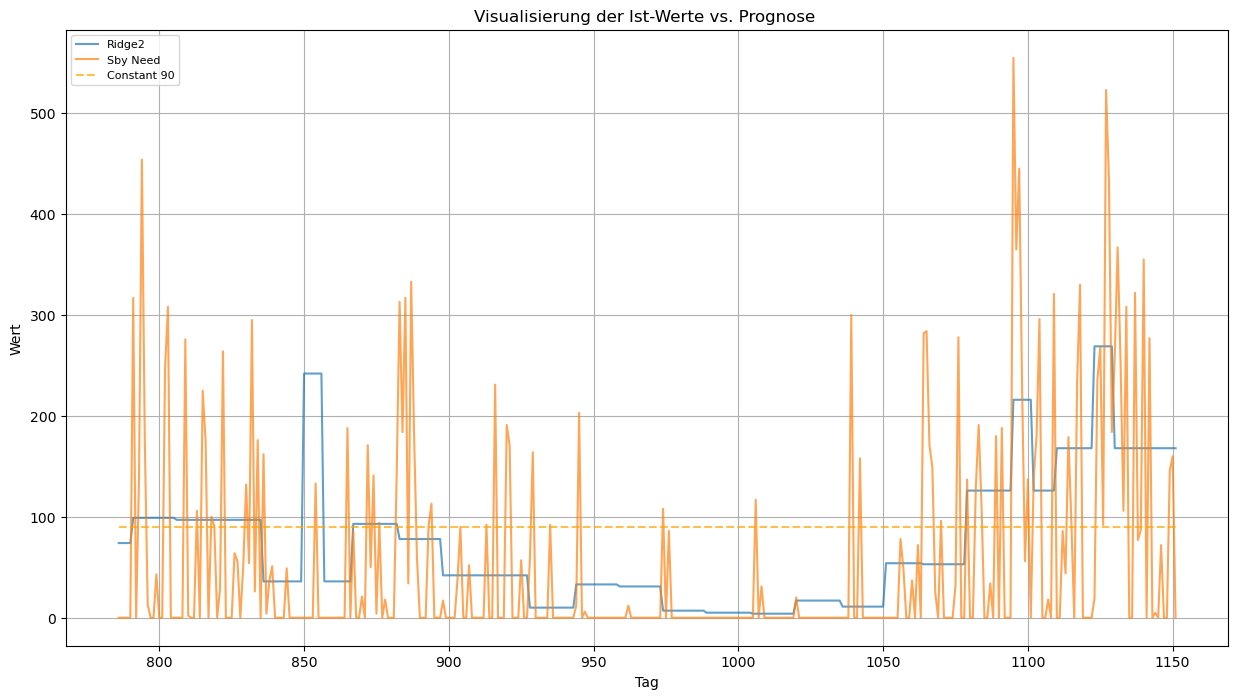

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Angenommen, die Spalte 'index' ist die Tagesnummer oder der Fortschritt
# Falls nicht vorhanden, erstellen wir eine fortlaufende Tagesnummerierung
if 'index' not in result_df.columns:
    result_df['index'] = range(len(result_df))

# Erstellen des Plots
f, ax = plt.subplots(figsize=(15, 8))

# Plot für 'ridge2'
sns.lineplot(data=result_df, x='index', y='ridge2', label='Ridge2', alpha=0.7)

# Plot für 'sby_need'
sns.lineplot(data=result_df, x='index', y='sby_need', label='Sby Need', alpha=0.7)

# Plot für 'constant_90'
sns.lineplot(data=result_df, x='index', y='constant_90', label='Constant 90', alpha=0.7, color='orange', linestyle='--')

# Diagrammtitel und Achsenbeschriftungen
plt.title('Visualisierung der Ist-Werte vs. Prognose ')
plt.xlabel('Tag')
plt.ylabel('Wert')

# Diagramm-Raster und Legende
plt.grid(True)
ax.legend(loc='upper left', fontsize='8')

# Diagramm anzeigen
plt.show()

